Pour une lecture améliorée, ce notebook est idéalement lu avec un outil qui gère les niveaux des titres Markdown.  
Par exemple avec l'extension 'Table of Contents' du module 'Nbextensions' de Jupyter.

# Prise en main de l'API openfoodfacts

## Install et import

In [1]:
try:
    import openfoodfacts
except:
    !pip install openfoodfacts
    import openfoodfacts

## Tests de l'API

Usage guide :
https://github.com/openfoodfacts/openfoodfacts-python/blob/master/docs/Usage.md

Les facets sont retournés sous forme de listes de dictionnaires.

Les variables sont définies à :
https://world.openfoodfacts.org/data/data-fields.txt

### Requête d'une facette : retourne les modalités d'une variable

In [2]:
additives = openfoodfacts.facets.get_additives()
print(len(additives))
additives[0:5]

564


[{'id': 'en:e330',
  'known': 1,
  'name': 'E330 - Citric acid',
  'products': 131579,
  'sameAs': ['https://www.wikidata.org/wiki/Q159683'],
  'url': 'https://world.openfoodfacts.org/additive/e330-citric-acid'},
 {'id': 'en:e322',
  'known': 1,
  'name': 'E322 - Lecithins',
  'products': 89068,
  'sameAs': ['https://www.wikidata.org/wiki/Q241595'],
  'url': 'https://world.openfoodfacts.org/additive/e322-lecithins'},
 {'id': 'en:e322i',
  'known': 1,
  'name': 'E322i - Lecithin',
  'products': 81380,
  'sameAs': ['https://www.wikidata.org/wiki/Q241595'],
  'url': 'https://world.openfoodfacts.org/additive/e322i-lecithin'},
 {'id': 'en:e500',
  'known': 1,
  'name': 'E500 - Sodium carbonates',
  'products': 55954,
  'sameAs': ['https://www.wikidata.org/wiki/Q190227'],
  'url': 'https://world.openfoodfacts.org/additive/e500-sodium-carbonates'},
 {'id': 'en:e415',
  'known': 1,
  'name': 'E415 - Xanthan gum',
  'products': 49913,
  'sameAs': ['https://www.wikidata.org/wiki/Q410768'],
  'ur

In [3]:
countries = openfoodfacts.facets.get_countries()
print(len(countries))

641


In [4]:
# openfoodfacts.facets.get_ingredients()   # erreur de l'API

In [5]:
languages = openfoodfacts.facets.get_languages()
print(len(languages))

137


In [6]:
places = openfoodfacts.facets.get_purchase_places()
print(len(places))

4806


In [7]:
stores = openfoodfacts.facets.get_stores()
print(len(stores))

6494


In [8]:
traces = openfoodfacts.facets.get_traces()
print(len(traces))

7770


### Requête de produits répondant à une seule modalité de facette

In [9]:
products = openfoodfacts.products.get_by_trace('egg')
print(len(products))
products[0:5]

24


[{'_id': '8711327480537',
  '_keywords': ['karamell',
   'gold',
   'mit',
   'alliance',
   'magnum',
   'ei',
   'rainforest',
   'billionaire',
   'keksgeschmack',
   'double',
   'eiskrem',
   'caramel'],
  'added_countries_tags': [],
  'additives_n': 7,
  'additives_old_n': 7,
  'additives_old_tags': ['en:e471',
   'en:e476',
   'en:e322',
   'en:e410',
   'en:e407',
   'en:e412',
   'en:e500'],
  'additives_original_tags': ['en:e471',
   'en:e476',
   'en:e322',
   'en:e410',
   'en:e407',
   'en:e412',
   'en:e500'],
  'additives_tags': ['en:e322',
   'en:e407',
   'en:e410',
   'en:e412',
   'en:e471',
   'en:e476',
   'en:e500'],
  'allergens': '',
  'allergens_from_ingredients': 'MILCH, MAGERMILCHPULVER, BUTTERFETT, MAGERMILCH, MOLKENERZEUGNIS, BUTTER, MILCH, MAGERMILCHPULVER, BUTTERFETT, MAGERMILCH, MOLKENERZEUGNIS, BUTTER, MILCH, MAGERMILCHPULVER, BUTTERFETT, MAGERMILCH, MOLKENERZEUGNIS, BUTTER',
  'allergens_from_user': '(de) ',
  'allergens_hierarchy': ['en:milk'],
  'all

In [10]:
products = openfoodfacts.products.get_by_country('France')
print(len(products))
products[0:5]

24


[{'_id': '3272460124337',
  '_keywords': ['the', 'vert', 'framboise', 'alcool', 'biere', 'san'],
  'added_countries_tags': [],
  'allergens': '',
  'allergens_from_ingredients': '',
  'allergens_from_user': '(fr) ',
  'allergens_hierarchy': [],
  'allergens_tags': [],
  'categories_properties': {},
  'categories_properties_tags': ['all-products',
   'categories-unknown',
   'agribalyse-food-code-unknown',
   'agribalyse-proxy-food-code-unknown',
   'ciqual-food-code-unknown',
   'agribalyse-unknown'],
  'checkers_tags': [],
  'code': '3272460124337',
  'codes_tags': ['code-13',
   '3272460124xxx',
   '327246012xxxx',
   '32724601xxxxx',
   '3272460xxxxxx',
   '327246xxxxxxx',
   '32724xxxxxxxx',
   '3272xxxxxxxxx',
   '327xxxxxxxxxx',
   '32xxxxxxxxxxx',
   '3xxxxxxxxxxxx'],
  'complete': 0,
  'completeness': 0.275,
  'correctors_tags': [],
  'countries': 'en:fr',
  'countries_hierarchy': ['en:france'],
  'countries_tags': ['en:france'],
  'created_t': 1622380812,
  'creator': 'kiliweb

In [11]:
ingredient = 'phosphate de calcium'
products_ingredient = openfoodfacts.products.get_by_ingredient(ingredient)
for product in products_ingredient:
    print (product['product_name'])

nature's bounty women's multivitamin
Velveeta
Mini Fruits
A  Toddler Tout-petits
Almond Dream Almond Milk



### Requête de produits répondant à plusieurs modalités

get_by_facets() : résultat très décevant. La requête ne retourne que 24 produits.

In [12]:
# liste des produits contenant des traces d'oeuf, et country=France
products = openfoodfacts.products.get_by_facets(
#     {'trace': 'egg', 'country': 'france'})
    {'trace': 'egg'})
print(len(products))
#products   # products est une liste de dictionnaires

24


In [13]:
products[1]

{'_id': '20411978',
 '_keywords': ['fabrique',
  'terre',
  'cereale',
  'mix',
  'ble',
  'seche',
  'italie',
  'pate',
  'la',
  'et',
  'semoule',
  'lasagne',
  'base',
  'vegetaux',
  'alimentaire',
  'derive',
  'en',
  'combino',
  'fsc',
  'vegetale',
  'boisson',
  'dur',
  'de',
  'aliment',
  'fsc-c109331',
  'garnir',
  'origine',
  'pomme'],
 'added_countries_tags': [],
 'additives_debug_tags': [],
 'additives_n': 0,
 'additives_old_n': 0,
 'additives_old_tags': [],
 'additives_original_tags': [],
 'additives_prev_original_tags': [],
 'additives_tags': [],
 'allergens': 'en:gluten',
 'allergens_from_ingredients': 'blé',
 'allergens_from_user': '(en) en:gluten',
 'allergens_hierarchy': ['en:gluten'],
 'allergens_lc': 'en',
 'allergens_tags': ['en:gluten'],
 'amino_acids_prev_tags': [],
 'amino_acids_tags': [],
 'brands': 'Combino',
 'brands_tags': ['combino'],
 'categories': "Aliments et boissons à base de végétaux, Aliments d'origine végétale, Céréales et pommes de terre,

In [14]:
for product in products:
    print(product['product_name'])

Double Gold Caramel Billionaire
Lasagnes
Haferflockenkekse mit heidelbeeren
Poêlée Paysanne
Blueberry Lemoncake
Sorbet parfum fraise au sucre de canne
Sorbet Melon
Vegane Pommersche Fein
Maxim 40% Protein Bar raspberry flavor
Zuppa di orzo e legumi
Pâte à tartiner cacahuètes
Soupe de poisson
Filet de porc aux fines herbes
Choco Bisson Citron
Haché de Jambon - à l'Emmental
Filet de saumon & pâtes au basilic, sauce citron
Le Moelleux
Crousti'Son Miel Sésame
Cookie Cacao Pépites
Le Kebab de Poulet et sa Semoule à l'Orientale
Le Moelleux
Haché de Jambon - à Pôeler
Le surimi râpé
Biscuits Figue et son


In [15]:
products[0].keys()

dict_keys(['_id', '_keywords', 'added_countries_tags', 'additives_n', 'additives_old_n', 'additives_old_tags', 'additives_original_tags', 'additives_tags', 'allergens', 'allergens_from_ingredients', 'allergens_from_user', 'allergens_hierarchy', 'allergens_tags', 'amino_acids_tags', 'brands', 'brands_tags', 'categories', 'categories_hierarchy', 'categories_lc', 'categories_properties', 'categories_properties_tags', 'categories_tags', 'checkers_tags', 'code', 'codes_tags', 'compared_to_category', 'complete', 'completeness', 'correctors_tags', 'countries', 'countries_hierarchy', 'countries_tags', 'created_t', 'creator', 'data_quality_bugs_tags', 'data_quality_errors_tags', 'data_quality_info_tags', 'data_quality_tags', 'data_quality_warnings_tags', 'data_sources', 'data_sources_tags', 'downgraded', 'ecoscore_data', 'ecoscore_grade', 'ecoscore_score', 'ecoscore_tags', 'editors_tags', 'entry_dates_tags', 'id', 'image_front_small_url', 'image_front_thumb_url', 'image_front_url', 'image_ingre

In [16]:
type(products)

list

### Requête d'un produit en particulier via le barcode

In [17]:
barcode = '3036810201280'
product = openfoodfacts.products.get_product(barcode)
print(product['product']['product_name'])
print("keys du dictionnaire :", list(product.keys()))
product

Dijon Originale
keys du dictionnaire : ['code', 'product', 'status', 'status_verbose']


{'code': '3036810201280',
 'product': {'_id': '3036810201280',
  '_keywords': ['lebensmittel',
   'gewurzmittel',
   'dijon-senfe',
   'unspecified',
   'dijon-senf',
   'saucen',
   'originale',
   'dijon',
   'senfe',
   'maille'],
  'added_countries_tags': [],
  'additives_debug_tags': [],
  'additives_n': 2,
  'additives_old_n': 1,
  'additives_old_tags': ['en:e330'],
  'additives_original_tags': ['en:e330', 'en:e224'],
  'additives_prev_original_tags': ['en:e330', 'en:e224'],
  'additives_tags': ['en:e224', 'en:e330'],
  'allergens': 'en:mustard,de:Kaliummetabisulfit',
  'allergens_from_ingredients': '',
  'allergens_from_user': '(en) en:mustard,de:Kaliummetabisulfit',
  'allergens_hierarchy': ['en:mustard', 'de:Kaliummetabisulfit'],
  'allergens_lc': 'en',
  'allergens_tags': ['en:mustard', 'de:kaliummetabisulfit'],
  'amino_acids_prev_tags': [],
  'amino_acids_tags': [],
  'brands': 'Maille',
  'brands_tags': ['maille'],
  'categories': 'Lebensmittel, Gewürzmittel, Saucen, Senfe

### Search

La méthode search_all() est préférable à search(). La seconde méthode retourne des méta-données en plus de l'itérable.

##### Méthode search()

In [18]:
query = 'mustard maille'
search_result = openfoodfacts.products.search(query)
# search_result

##### Méthode search_all()

In [19]:
query = 'mustard maille'
search_result = openfoodfacts.products.search_all(query)
for product in search_result:
    #     print (product['product_name'])
    #     display(product)
    pass

### Download data

In [20]:
file_type = 'csv'
# openfoodfacts.utils.download_data(file_type)

L'instruction download_data() télécharge le data set dans le dossier ~/user.

## Conclusion des tests de l'API

Les résultats sont décevants. Les requêtes retournent des données incomplètes.  
La fonction download_data() est utile car elle permet de récupérer le dataset.

# Prise en main du jeu de données openfoodfacts

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress as reg_lin
from os.path import exists
from sklearn import decomposition
from sklearn import preprocessing

Modification des paramètres d'affichage de Jupyter :

In [22]:
# pour gérer l'affichage des dataframes pandas
pd.options.display.max_rows = 100
pd.options.display.max_columns = 200

# pour gérer l'affichage des arrays numpy
# 230 sur ma config bureau, 165 sur ma config portable
np.set_printoptions(linewidth=165)

# pour afficher les gros fichiers sur toute la largeur de l'écran
from IPython.core.display import HTML
HTML("<style>.container { width:97% }</style>")

## Ouverture du fichier .csv  =>  df1

Pour le fichier csv, on prend connaissance de :  
- son contenu (fonction "display" de IPython).
- ses infos et sa description (méthodes "info" et "describe" de pandas).
- de la qualité des données (fonctions du module missingno).

In [23]:
# Téléchargement du fichier csv contenant le jeu de données openfoodfatcs
download = False    # False pour utiliser le fichier déjà téléchargé    # si True : download complet
          
# si le fichier csv n'existe pas, un download est demandé
if not exists('en.openfoodfacts.org.products.csv') :
    download = True
          
if download :
    # installation de l'API openfoodfacts
    try:
        import openfoodfacts
    except:
        !pip install openfoodfacts
        import openfoodfacts
    # téléchargement du .csv
    file_type = 'csv'
    openfoodfacts.utils.download_data(file_type)     # L'instruction download_data() télécharge le dataset dans le dossier ~/user.

In [24]:
# Chargement du df1 à partir du fichier csv ou à partir d'un pickle
create_pickle = False  # si False : appel du pickle existant    # si True : création du pickle

# si le fichier pickle n'existe pas, une création est demandée
if not exists('products.pkl'):
    create_pickle = True

if create_pickle:
    # création du pickle
    df1 = pd.read_csv('en.openfoodfacts.org.products.csv',
                      sep='\t',
                      low_memory=False)
    df1.to_pickle('products.pkl')
else:  # on charge le pickle
    df1 = pd.read_pickle('products.pkl')

## Affichage de quelques lignes du df

In [25]:
with pd.option_context('display.max_rows', 400, 'display.max_colwidth', 1000):
    display(df1.tail())
#     display(df1.loc[[4]])
#     display(df1.loc[4:5000])

code  \
1772406    9999999910128   
1772407        999999999   
1772408    9999999990397   
1772409    9999999999994   
1772410  999999999999999   

                                                                                                    url  \
1772406  http://world-en.openfoodfacts.org/product/9999999910128/sandwich-club-rillette-poisson-combava   
1772407               http://world-en.openfoodfacts.org/product/999999999/the-noir-bio-darjeeling-pages   
1772408                                    http://world-en.openfoodfacts.org/product/9999999990397/fati   
1772409                 http://world-en.openfoodfacts.org/product/9999999999994/light-free-skyr-a-boire   
1772410                     http://world-en.openfoodfacts.org/product/999999999999999/signal-toothpaste   

                            creator   created_t      created_datetime  \
1772406                     kiliweb  1572513866  2019-10-31T09:24:26Z   
1772407              nutrinet-sante  1608105503  2020-12-16T07:58:23Z   
1772408                     kiliweb  1581171613  2020-02-08T14:20:13Z   
1772409                     kiliweb  1613129728  2021-02-12T11:35:28Z   
1772410  openfoodfacts-contributors  1587222660  2020-04-18T15:11:00Z   

         last_modified_t last_modified_datetime  \
1772406       1572513866   2019-10-31T09:24:26Z   
1772407       1608105504   2020-12-16T07:58:24Z   
1772408       1582644247   2020-02-25T15:24:07Z   
1772409       1613129730   2021-02-12T11:35:30Z   
1772410       1605558295   2020-11-16T20:24:55Z   

                                   product_name abbreviated_product_name  \
1772406  Sandwich club Rillette poisson combava                      NaN   
1772407                 Thé noir BIO Darjeeling                      NaN   
1772408                                    Fati                      NaN   
1772409               Light & Free SKYR A BOIRE                      NaN   
1772410                       Signal Toothpaste                      NaN   

        generic_name quantity packaging packaging_tags packaging_text brands  \
1772406          NaN      NaN       NaN            NaN            NaN    NaN   
1772407          NaN      NaN       NaN            NaN            NaN  Pagès   
1772408          NaN    440 g       NaN            NaN            NaN    NaN   
1772409          NaN      NaN       NaN            NaN            NaN    NaN   
1772410          NaN      NaN       NaN            NaN            NaN    NaN   

        brands_tags                                        categories  \
1772406         NaN                                               NaN   
1772407       pages                                               NaN   
1772408         NaN                                               NaN   
1772409         NaN                                               NaN   
1772410         NaN  Non food products, Open Beauty Facts, Toothpaste   

                                                 categories_tags  \
1772406                                                      NaN   
1772407                                                      NaN   
1772408                                                      NaN   
1772409                                                      NaN   
1772410  en:non-food-products,en:open-beauty-facts,en:toothpaste   

                                          categories_en origins origins_tags  \
1772406                                             NaN     NaN          NaN   
1772407                                             NaN     NaN          NaN   
1772408                                             NaN     NaN          NaN   
1772409                                             NaN     NaN          NaN   
1772410  Non food products,Open Beauty Facts,Toothpaste     NaN          NaN   

        origins_en manufacturing_places manufacturing_places_tags labels  \
1772406        NaN                  NaN                       NaN    NaN   
1772407        NaN                  NaN    

In [26]:
length = len(df1)
print("length =", length)

length = 1772411


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772411 entries, 0 to 1772410
Columns: 186 entries, code to carnitine_100g
dtypes: float64(123), int64(2), object(61)
memory usage: 2.5+ GB



## Nettoyage de données

### Suppression des valeurs aberrantes (remplacement par NaN)

La liste suivante contient les variables que nous allons nettoyer, ainsi que les valeurs min/max des intervalles en dehors desquelles les valeurs sont aberrantes.
Les valeurs aberrantes ont été remplacées par des NaN.

In [28]:
liste_variables_pour_nettoyage = [
                ['energy_100g', 0, 3800],     # 3800kJ correspondent à 100g de lipides
                ['sugars_100g', 0, 100],     # il y a au maximum 100g de sucre dans 100g d'aliment
                ['saturated-fat_100g', 0, 100],
                ['fat_100g', 0, 100],
                ['salt_100g', 0, 100],
                ['proteins_100g', 0, 100], 
                ['fiber_100g', 0, 100], 
                ['cholesterol_100g', 0, 5],     # une valeur supérieure à 5g/100g est aberrante
                ['-lactose_100g', 0, 100],    
                ['nutriscore_score', -15, 40],
                ['energy-kj_100g', 0, 3800],
                ['energy-kcal_100g', 0, 900],
                ['monounsaturated-fat_100g', 0, 100],    
                ['polyunsaturated-fat_100g', 0, 100],
                ['trans-fat_100g', 0, 100],    
                ['carbohydrates_100g', 0, 100],            
                ['alcohol_100g', 0, 100],    
                ['vitamin-a_100g', 0, 0.01],    
                ['vitamin-c_100g', 0, 1],    
                ['calcium_100g', 0, 100],    
                ['iron_100g', 0, 0.1],    
                ['sodium_100g', 0, 100],
]

Exécution du nettoyage

In [29]:
print('Variable'.center(26, ' '), 'Borne min'.center(11, ' '),
      'Borne max'.center(11,
                         ' '), 'Nb de valeurs avant nettoyage'.center(33, ' '),
      'Nb de remplacements NaN'.center(25, ' '), '%remplacés'.center(11, ' '))
print(''.center(123, '-'))

for var in range(len(liste_variables_pour_nettoyage)):
    nom = liste_variables_pour_nettoyage[var][0]
    min_x = liste_variables_pour_nettoyage[var][1]
    max_x = liste_variables_pour_nettoyage[var][2]
    count_avant = df1[nom].count()
    df1[nom] = df1[nom].apply(lambda x: np.nan
                              if (x < min_x or x > max_x) else x)
    count_apres = df1[nom].count()
    print(
        nom.center(26, ' '),
        str(min_x).center(11, ' '),
        str(max_x).center(11, ' '),
        str(count_avant).center(33, ' '),
        str(count_avant - count_apres).center(25, ' '), "{0:.2f}%".format(
            (count_avant - count_apres) / count_avant * 100).center(11, ' '))

         Variable           Borne min   Borne max    Nb de valeurs avant nettoyage    Nb de remplacements NaN   %remplacés
---------------------------------------------------------------------------------------------------------------------------
       energy_100g              0          3800                 1407610                         5198              0.37%   
       sugars_100g              0          100                  1382019                          64               0.00%   
    saturated-fat_100g          0          100                  1356270                          37               0.00%   
         fat_100g               0          100                  1399529                          86               0.01%   
        salt_100g               0          100                  1349530                         858               0.06%   
      proteins_100g             0          100                  1400523                          59               0.00%   
        fiber_1

### Compréhension des données avec nutriscore_grade A et nutriscore_score élevé

In [30]:
df_nutriscore_a = df1[(df1['nutriscore_grade'] == 'a')
                      & (df1['nutriscore_score'] > 1.0)]
print("Length : ", len(df_nutriscore_a))
df_nutriscore_a.head()

Length :  161


code                                                url  \
41441   0021136010541  http://world-en.openfoodfacts.org/product/0021...   
337560  0632565000012  http://world-en.openfoodfacts.org/product/0632...   
480379  2000000037744  http://world-en.openfoodfacts.org/product/2000...   
610101       27017050  http://world-en.openfoodfacts.org/product/2701...   
647536  3057640183843  http://world-en.openfoodfacts.org/product/3057...   

                           creator   created_t      created_datetime  \
41441   openfoodfacts-contributors  1556127634  2019-04-24T17:40:34Z   
337560                     kiliweb  1520175639  2018-03-04T15:00:39Z   
480379  openfoodfacts-contributors  1477900849  2016-10-31T08:00:49Z   
610101  openfoodfacts-contributors  1457781079  2016-03-12T11:11:19Z   
647536  openfoodfacts-contributors  1533207417  2018-08-02T10:56:57Z   

        last_modified_t last_modified_datetime                 product_name  \
41441        1606745169   2020-11-30T14:06:09Z                 Agua Mineral   
337560       1614617616   2021-03-01T16:53:36Z  Fiji Natural Artesian Water   
480379       1582745934   2020-02-26T19:38:54Z                 Spring water   
610101       1612301292   2021-02-02T21:28:12Z                     Rocheval   
647536       1614952455   2021-03-05T13:54:15Z                       Volvic   

       abbreviated_product_name                   generic_name quantity  \
41441                       NaN                            NaN   600 ml   
337560                      NaN                            NaN   500 ml   
480379                      NaN  Hamidiye natural spring water   125 ml   
610101                      NaN                            NaN   0.75 l   
647536                      NaN                            NaN       1l   

                                 packaging                     packaging_tags  \
41441        Pet desechable con taparrosca      pet-desechable-con-taparrosca   
337560  Botella de plastico, en:pet-bottle  botella-de-plastico,en-pet-bottle   
480379                        Plastic,Film                       plastic,film   
610101                 Bouteille,plastique                bouteille,plastique   
647536                         PET Flasche                        pet-flasche   

       packaging_text        brands   brands_tags  \
41441             NaN    Topo Chico    topo-chico   
337560            NaN          fiji          fiji   
480379            NaN  Hamidiye,KLM  hamidiye,klm   
610101            NaN      Rocheval      rocheval   
647536            NaN        Volvic        volvic   

                                               categories  \
41441   Bebidas, Bebidas carbonatadas, Aguas, Aguas de...   
337560                    Boissons, Eaux, Eaux de sources   
480379                   Beverages, Waters, Spring waters   
610101  Beverages, Waters, Spring waters, Mineral wate...   
647536  Getränke, Wasser, Quellwasser, Mineralwasser, ...   

                                          categories_tags  \
41441   en:beverages,en:carbonated-drinks,en:waters,en...   
337560            en:beverages,en:waters,en:spring-waters   
480379            en:beverages,en:waters,en:spring-waters   
610101  en:beverages,en:waters,en:spring-waters,en:min...   
647536  en:beverages,en:waters,en:spring-waters,en:min...   

                                            categories_en  \
41441   Beverages,Carbonated drinks,Waters,Spring wate...   
337560                     Beverages,Waters,Spring waters   
480379                     Beverages,Waters,Spring waters   
610101  Beverages,Waters,Spring waters,Mineral waters,...   
647536  Beverages,Waters,Spring waters,Mineral waters,...   

                                  origins  \
41441                              México   
337560                       Isla de Fiji   
480379                             Turkey   
610101  Source Werretaler,Löhne,Allemagne   
647536                                NaN   

                       

##### Conclusion :
Toutes les valeurs problématiques que j'ai observées proviennent de teneurs en sodium aberrantes. Généralement pour des boissons.
Exemple de bug : Volvic contient 12mg/L de sodium. Mais openfoodfacts le considère à 12g/L ce qui lui donne un score de +10 points.

## Nom des colonnes et disponibilité des données par colonne

Description du dataset après nettoyage

In [31]:
df1_describe = df1.describe(include='all')
display(df1_describe)

code                                                url  \
count         1772411                                            1772411   
unique        1772407                                            1772407   
top     7798049540559  http://world-en.openfoodfacts.org/product/3770...   
freq                2                                                  2   
mean              NaN                                                NaN   
std               NaN                                                NaN   
min               NaN                                                NaN   
25%               NaN                                                NaN   
50%               NaN                                                NaN   
75%               NaN                                                NaN   
max               NaN                                                NaN   

        creator     created_t      created_datetime  last_modified_t  \
count   1772407  1.772411e+06               1772411     1.772411e+06   
unique    13503           NaN               1522629              NaN   
top     kiliweb           NaN  2020-04-23T17:22:07Z              NaN   
freq     998310           NaN                    28              NaN   
mean        NaN  1.551895e+09                   NaN     1.587144e+09   
std         NaN  5.030906e+07                   NaN     2.886685e+07   
min         NaN  1.328021e+09                   NaN     1.333873e+09   
25%         NaN  1.519640e+09                   NaN     1.577994e+09   
50%         NaN  1.563093e+09                   NaN     1.587670e+09   
75%         NaN  1.587672e+09                   NaN     1.609847e+09   
max         NaN  1.620176e+09                   NaN     1.620176e+09   

       last_modified_datetime                  product_name  \
count                 1772411                       1694885   
unique                1378569                       1113910   
top      2021-05-01T11:16:01Z  Aceite de oliva virgen extra   
freq                      213                          1256   
mean                      NaN                           NaN   
std                       NaN                           NaN   
min                       NaN                           NaN   
25%                       NaN                           NaN   
50%                       NaN                           NaN   
75%                       NaN                           NaN   
max                       NaN                           NaN   

       abbreviated_product_name                              generic_name  \
count                      3660                                    113926   
unique                     3601                                     82994   
top        6x27,5cl tourtel twi  Pâtes alimentaires de qualité supérieure   
freq                          9                                       284   
mean                        NaN                                       NaN   
std                         NaN                                       NaN   
min                         NaN                                       NaN   
25%                         NaN                                       NaN   
50%                         NaN                                       NaN   
75%                         NaN                                       NaN   
max                         NaN                                       NaN   

       quantity   packaging    packaging_tags              packaging_text  \
count    457438      284337            284310                        3996   
unique    35535       51234             41782                        2423   
top       500 g  Kunststoff  sachet,plastique  1 sachet plastique à jeter   
freq      19776        6477              9113                          96   
mean        NaN         NaN               NaN                         NaN   
std         NaN         NaN               NaN                         NaN   
min         NaN   

Définitions récupérées :

In [32]:
definitions = {
"code" : "barcode of the product",     # (can be EAN-13 or internal codes for some food stores), for products without a barcode, Open Food Facts assigns a number starting with the 200 reserved prefix
"url" : "url of the product page on Open Food Facts",
"creator" : "contributor who first added the product",
"created_t" : "date that the product was added (UNIX timestamp format)",
"created_datetime" : "date that the product was added (iso8601 format: yyyy-mm-ddThh:mn:ssZ)",
"last_modified_t" : "date that the product page was last modified",
"product_name" : "name of the product",
"quantity" : "quantity and unit",
"packaging" : "shape, material",
"origins" : "origins of ingredients",
"manufacturing_places" : "places where manufactured or transformed",
"first_packaging_code_geo" : "coordinates corresponding to the first packaging code indicated",
"countries" : "list of countries where the product is sold",
"serving_size" : "serving size in g",
"no_nutriments" : "indicates if the nutrition facts are indicated on the food label",
"additives_n" : "number of food additives",
"nutrition_grade_fr" : "nutrition grade ('a' to 'e'). see https://fr.openfoodfacts.org/nutriscore",
"fruits-vegetables-nuts_100g" : "% of fruits, vegetables and nuts (excluding potatoes, yams, manioc)",
"carbon-footprint_100g" : "carbon footprint (as indicated on the packaging of some products)",
"nutrition-score-fr_100g" : "Nutri-Score FR",     # Nutrition score derived from the UK FSA score and adapted for the French market (formula defined by the team of Professor Hercberg)
"nutrition-score-uk_100g" : "nutrition score defined by the UK Food Standards Administration (FSA)",
"pnns_groups_1" : "parmi les 7 groupes d'aliments du PNNS",     # https://www.mangerbouger.fr/pro/IMG/pdf/livret_civ.pdf
"nova_group" : "Une classification en 4 groupes (1,2,3,4) pour mettre en évidence le degré de transformation des aliments"     # https://fr.openfoodfacts.org/nova
}

In [33]:
print("NOM DES COLONNES".rjust(45, ' '), "NOMBRE DE DONNEES".rjust(18, ' '),
      "% DISPONIBLE".rjust(15, ' '), "DTYPE".rjust(10, ' '), "   DESCRIPTION")
for colonne in df1_describe:
    if colonne in definitions:
        description = definitions[colonne]
    else:
        description = ""
    print(
        colonne.rjust(45, ' '),
        str(int(df1_describe[colonne]['count'])).rjust(18, ' '),
        "{0:0.3f}".format(df1_describe[colonne]['count'] / len(df1) *
                          100).rjust(15, ' '),
        str(df1[colonne].dtype).rjust(10, ' '), "   " + description)

                             NOM DES COLONNES  NOMBRE DE DONNEES    % DISPONIBLE      DTYPE    DESCRIPTION
                                         code            1772411         100.000     object    barcode of the product
                                          url            1772411         100.000     object    url of the product page on Open Food Facts
                                      creator            1772407         100.000     object    contributor who first added the product
                                    created_t            1772411         100.000      int64    date that the product was added (UNIX timestamp format)
                             created_datetime            1772411         100.000     object    date that the product was added (iso8601 format: yyyy-mm-ddThh:mn:ssZ)
                              last_modified_t            1772411         100.000      int64    date that the product page was last modified
                       last_modified_datetime

## Notions de calcul du Nutriscore et données correspondantes dans le dataset

## Analyse univariée des variables du dataframe df1

### Fonction histogramme()

Retourne un histogramme pour une variable (colonne) du df1

Arguments :

    - colonne : string du nom de colonne
    - min_x : valeur min représentée en abcisse
    - max_x : valeur max représentée en abcisse
    - density : si True, trace les fréquences (normées à 1) ; si False, trace les effectifs.
    - type_variable : 'discrète' pour un tracé de type barchart ; 'continue' pour un tracé de type histogramme
    - n_bins : nb d'intervalles (ils peuvent être en-dehors du tracé de l'histogramme)
    - unite : string indiquant l'unité de la variable colonne.

In [34]:
def histogramme(colonne,
                min_x=None,
                max_x=None,
                density=True,
                type_variable='discrète',
                n_bins=None,
                unite=None):

    # extraction du dataframe
    ser = df1[colonne]
    total_count = df1_describe[colonne]['count']

    # ser_min, ser_max    # l'histogramme tient compte des bins en dehors du tracé
    ser_min = ser.min()
    ser_max = ser.max()

    # type_variable
    if type_variable == 'discrète':  # on trace un bar chart centré sur la valeur centrale plutôt qu'un "vrai" histogramme
        align = 'left'
        rwidth = 0.8
        bins = range(
            int(ser_min), int(ser_max + 1)
        )  # il y a autant de bins que de modalités de la variable discrète
    elif type_variable == 'continue':
        align = 'mid'
        rwidth = 1.0
        if n_bins is None:
            nb_bins = int(np.log2(total_count) + 1)  # Règle de Sturges
        else:
            nb_bins = n_bins
        bins = [(ser_min + x * (ser_max - ser_min) / nb_bins)
                for x in range(0, nb_bins)]  # nb_bins espacés linéairement

    # plotting
    plt.style.use('seaborn')
    plt.figure(edgecolor='black', linewidth=4)

    # titre
    if density == True:
        if type_variable == 'discrète':
            plt.title(label='Fréquence de la variable " ' + colonne +
                      ' "')  #'  (Effectif total = '+str(int(total_count))+')')
        elif type_variable == 'continue':
            plt.title(
                label='Densité de probabilité de la variable " ' + colonne +
                ' "',
                size=18
            )  #  "  (Effectif total = '+str(int(total_count))+')', size=15)
    else:
        plt.title(label='Distribution de la variable " ' + colonne +
                  ' "')  #  (Effectif total = '+str(int(total_count))+')')

    # ajout de lignes verticales sur les histogrammes de nutriscores
    if str(colonne).find(
            'nutri') != -1:  # le nom de la colonne est de type "nutriscore"
        plt.axvline(x=-1 - 0.5, color='green')  # grade A solide
        plt.axvline(x=2 - 0.5, color='lightgreen')  # grade B solide
        plt.axvline(x=10 - 0.5, color='yellow')  # grade C solide
        plt.axvline(x=18 - 0.5, color='orange')  # grade D solide

    # plotting de l'histogramme
    plt.hist(ser,
             bins=bins,
             density=density,
             label=colonne,
             align=align,
             rwidth=rwidth)
    plt.xlim(min_x, max_x)
    label_x = colonne if unite is None else colonne + f" ({unite})"
    plt.xlabel(label_x, size=16)
    plt.xticks(size=12)
    plt.yticks(size=10)
    plt.show()

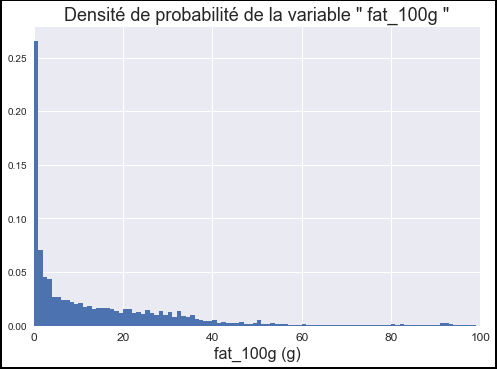

In [35]:
# Test de la fonction histogramme()
histogramme('fat_100g',
            type_variable='continue',
            density=True,
            min_x=0,
            max_x=100,
            n_bins=100,
            unite='g')

### Fonction boite_moustaches()

Retourne un boxplot pour une variable (colonne) du df1.  
Marque la moyenne avec un point rouge.
Affiche les valeurs : moyenne, médiane, écart-type (empirique).

Arguments :  
- colonne : string du nom de colonne  
- min_x : valeur min représentée en abcisse  
- max_x : valeur max représentée en abcisse  
- unite : string indiquant l'unité de la variable colonne.

In [36]:
def boite_moustaches(colonne='energy-kj_100g',
                     min_x=None,
                     max_x=None,
                     unite=None):
    plt.style.use('seaborn')

    # extraction du dataframe
    ser = df1[colonne]
    ser.dropna(inplace=True)

    # filtration des valeurs aberrantes. On exclue les valeurs à l'extérieur de l'intervalle [min_x, max_x] considérées comme aberrantes.
    largeur = max_x - min_x

    def f_bool(x):
        if x < min_x:
            return False
        elif x > max_x:
            return False
        else:
            return True

    ser_bool = ser.apply(lambda x: f_bool(x))
    total_count = ser_bool.sum(
    )  # nb de valeurs comprises dans l'intervalle [min_x, max_x]
    ser = ser[ser_bool]

    # moyenne, médiane, écart-type
    moyenne = ser.mean()
    mediane = ser.median()
    ecart_type = ser.std()

    # plotting boxplot
    plt.style.use('seaborn')
    plt.figure(edgecolor='black', linewidth=4)
    plt.boxplot(ser, vert=0)
    plt.xlim(min_x - 0.01 * largeur, max_x + 0.01 * largeur)
    plt.ylim(1.25, 0.75)
    plt.title(label='Distribution de la variable " ' + colonne +
              ' "  (Effectif total = ' + str(int(total_count)) + ')')
    plt.yticks(ticks=[1], labels=[''])
    label_x = colonne if unite is None else colonne + f" ({unite})"
    plt.xlabel(label_x)
    # plotting dot "moyenne"
    plt.plot(
        moyenne, 1, marker='o', markersize=10, color='red'
    )  # le boxplot est tracé à l'ordonnée y=1  # L'axe des y est inversé
    # annotations
    plt.annotate(text="Médiane = {0:0.2f}".format(mediane),
                 xy=(min_x + largeur / 20, 0.8),
                 color='green')
    plt.annotate(text="Moyenne = {0:0.2f}".format(moyenne),
                 xy=(min_x + largeur / 20, 0.85),
                 color='red')
    plt.annotate(text="Ecart-type = {0:0.2f}".format(ecart_type),
                 xy=(min_x + largeur / 20, 0.9),
                 color='blue')
    plt.show()

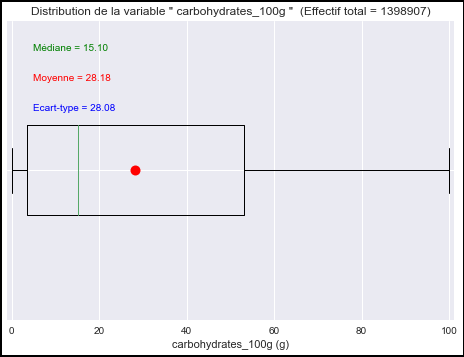

In [37]:
boite_moustaches(colonne='carbohydrates_100g', min_x=0, max_x=100, unite='g')

### Tracé d'histogrammes et de boxplots

#### Variables quantitatives discrètes

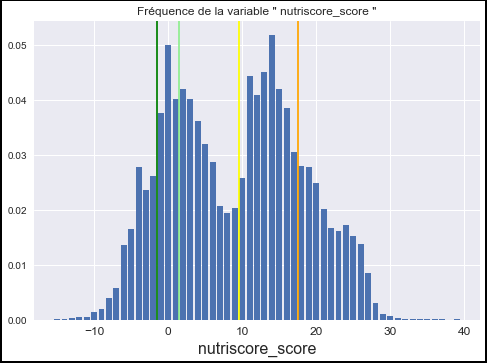

In [38]:
histogramme('nutriscore_score', type_variable='discrète')

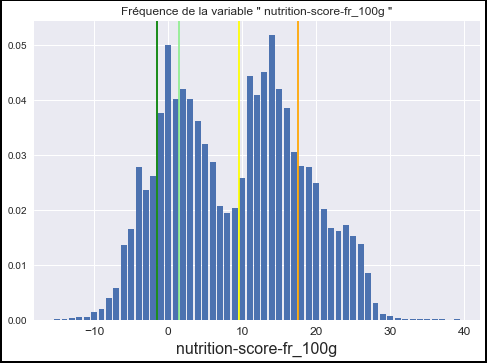

In [39]:
histogramme('nutrition-score-fr_100g', type_variable='discrète')

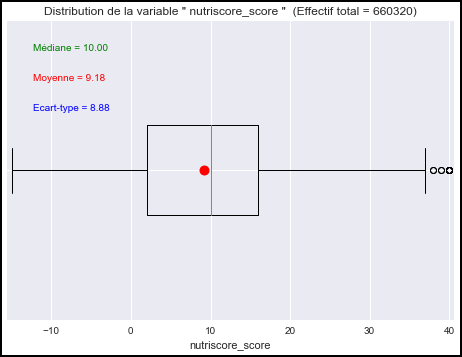

In [40]:
boite_moustaches(colonne='nutriscore_score', min_x=-15, max_x=40)

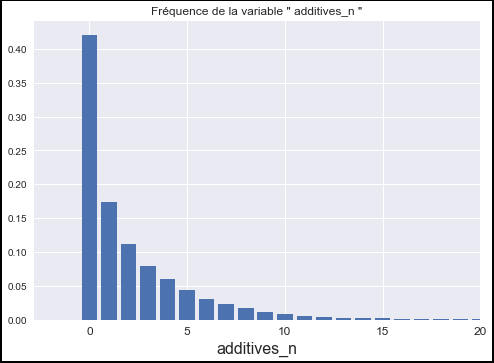

In [41]:
histogramme('additives_n', max_x=20, type_variable='discrète')

La distribution suit une loi géométrique.

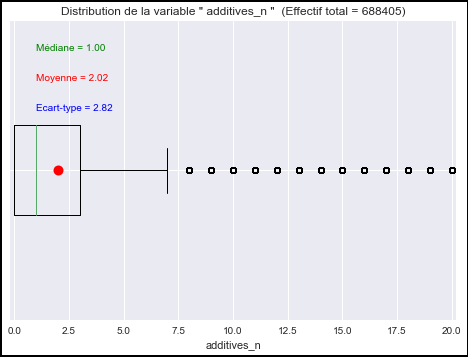

In [43]:
boite_moustaches(colonne='additives_n', min_x=0, max_x=20)

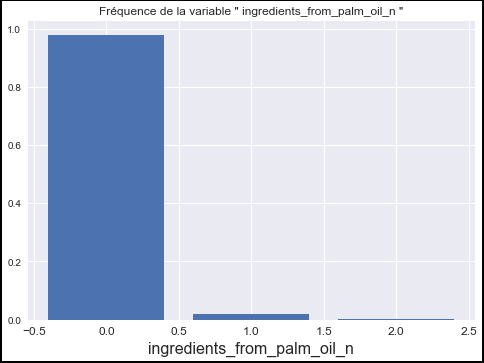

In [44]:
histogramme('ingredients_from_palm_oil_n', type_variable='discrète')

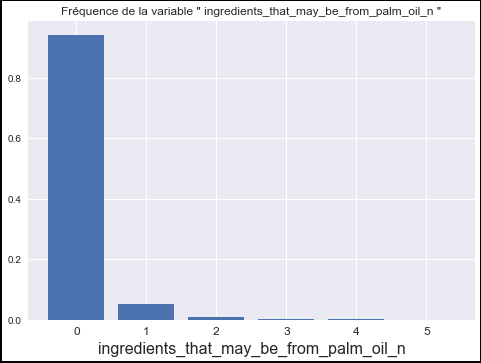

In [45]:
histogramme('ingredients_that_may_be_from_palm_oil_n', type_variable='discrète')

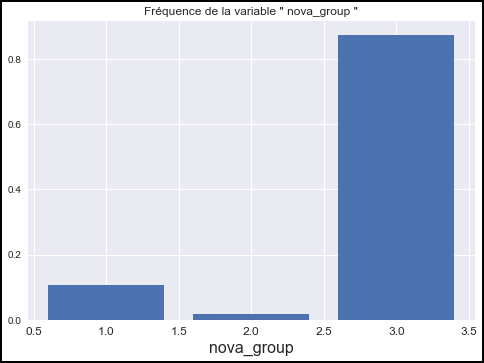

In [46]:
histogramme('nova_group', type_variable='discrète')

#### Variables quantitatives continues

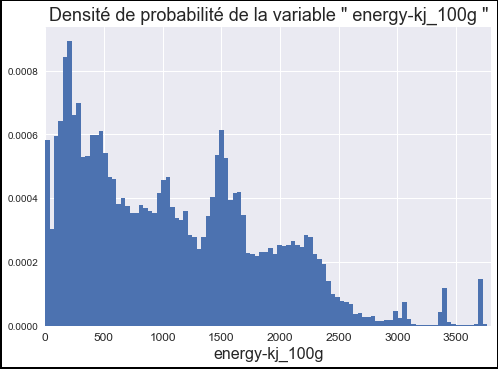

In [47]:
histogramme('energy-kj_100g', type_variable='continue', density=True, min_x=0, max_x=3800, n_bins=100)

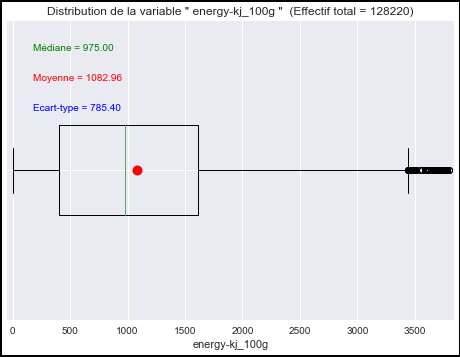

In [48]:
boite_moustaches(colonne='energy-kj_100g', min_x=-10, max_x=3800)

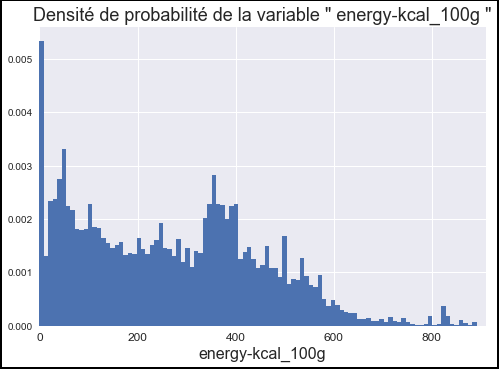

In [49]:
histogramme('energy-kcal_100g', type_variable='continue', density=True, min_x=0, max_x=910, n_bins=100) 

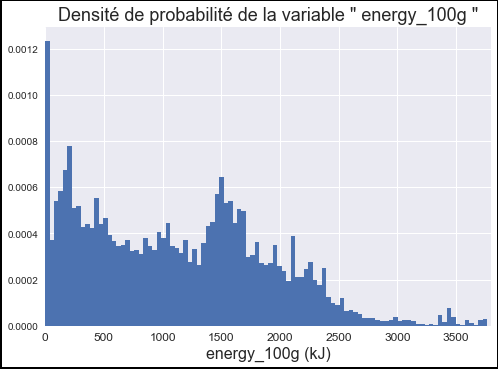

In [50]:
histogramme('energy_100g', type_variable='continue', density=True, min_x=0, max_x=3800, n_bins=100, unite='kJ')

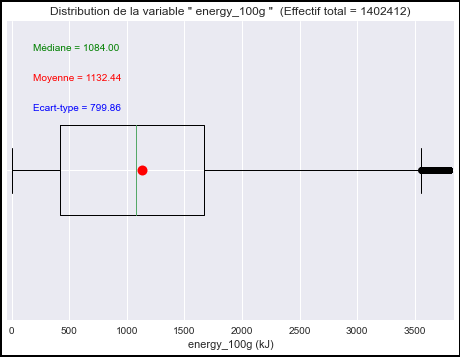

In [51]:
boite_moustaches(colonne='energy_100g', min_x=0, max_x=3800, unite='kJ')

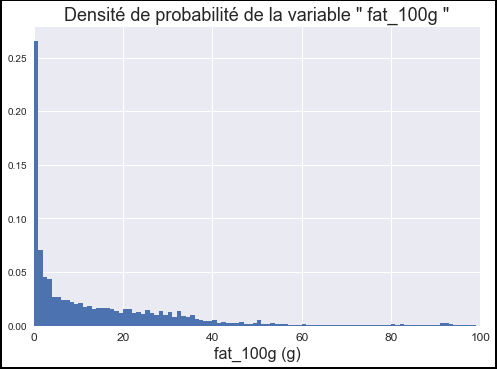

In [52]:
histogramme('fat_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100, unite='g')

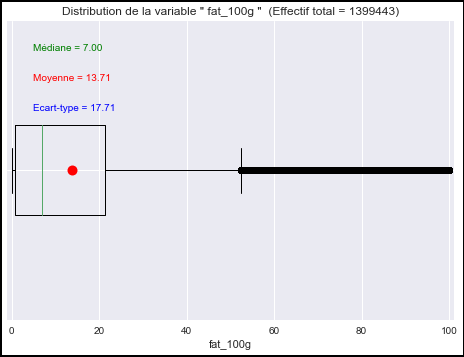

In [53]:
boite_moustaches(colonne='fat_100g', min_x=0, max_x=100)

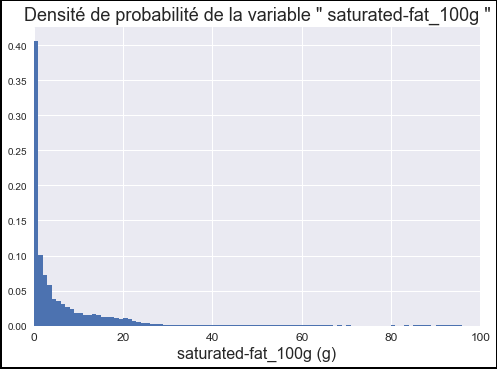

In [54]:
histogramme('saturated-fat_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100, unite='g')

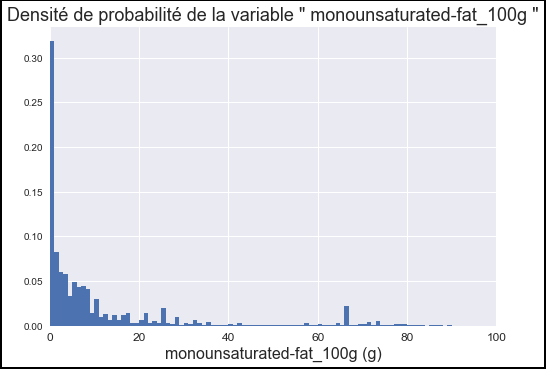

In [55]:
histogramme('monounsaturated-fat_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100, unite='g')

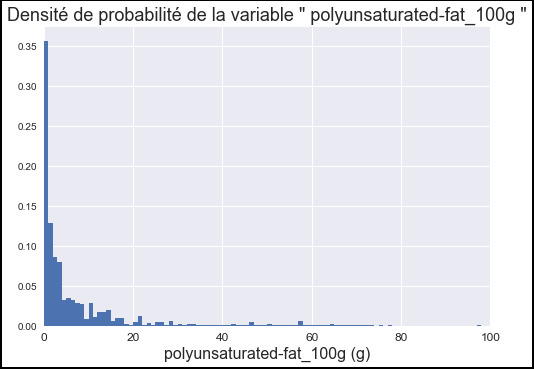

In [56]:
histogramme('polyunsaturated-fat_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100, unite='g')

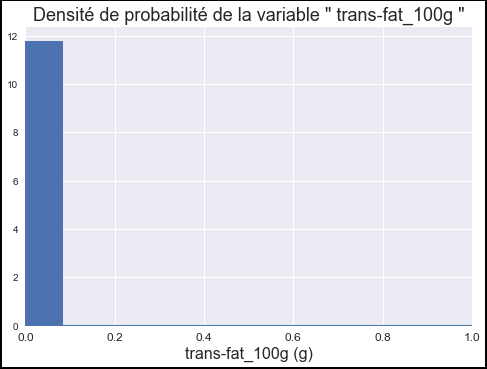

In [57]:
histogramme('trans-fat_100g', type_variable='continue', density=True, min_x=0, max_x=1, n_bins=1000, unite='g')

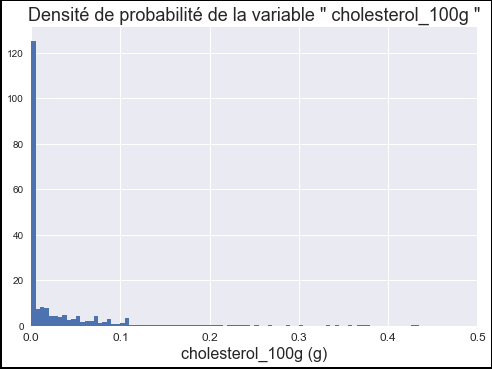

In [58]:
histogramme('cholesterol_100g', type_variable='continue', density=True, min_x=0, max_x=0.5, n_bins=1000, unite='g')

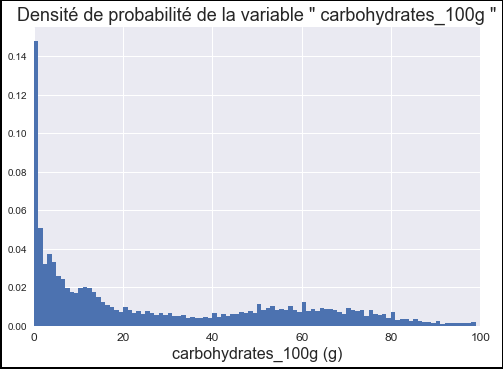

In [59]:
histogramme('carbohydrates_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100, unite='g')

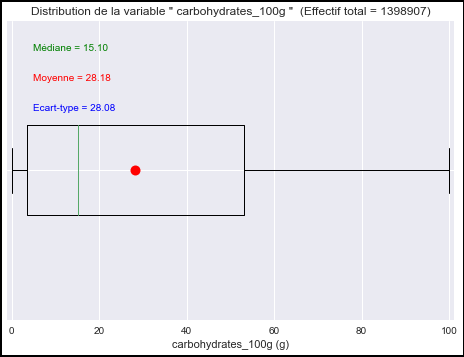

In [60]:
boite_moustaches(colonne='carbohydrates_100g', min_x=0, max_x=100, unite='g')

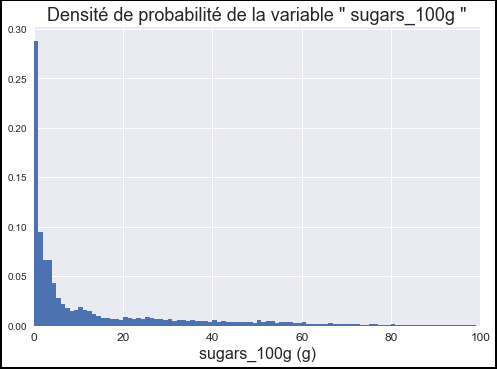

In [61]:
histogramme('sugars_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100, unite='g')

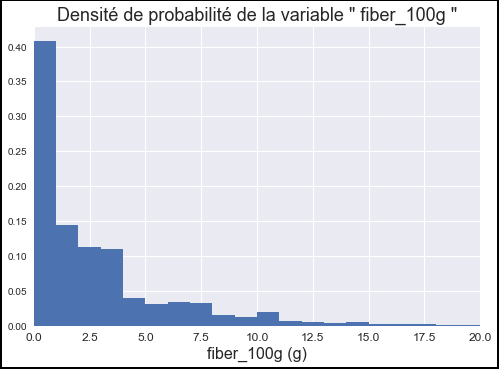

In [62]:
histogramme('fiber_100g', type_variable='continue', density=True, min_x=0, max_x=20, n_bins=100, unite='g')

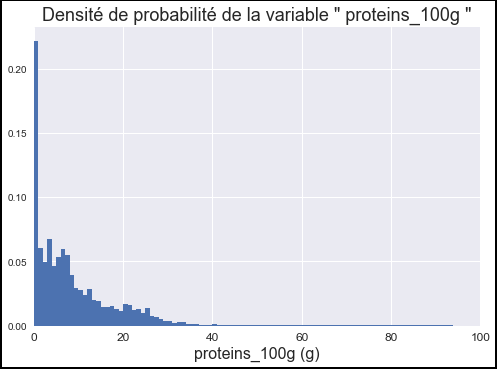

In [63]:
histogramme('proteins_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100, unite='g')

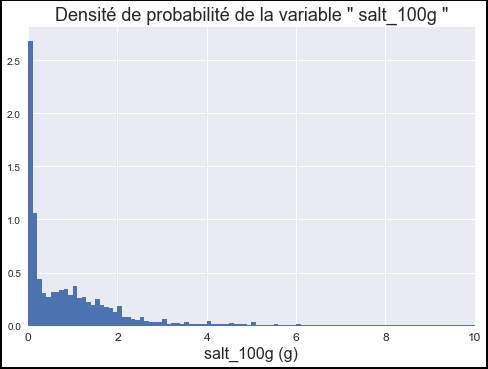

In [64]:
histogramme('salt_100g', type_variable='continue', density=True, min_x=0, max_x=10, n_bins=1000, unite='g')

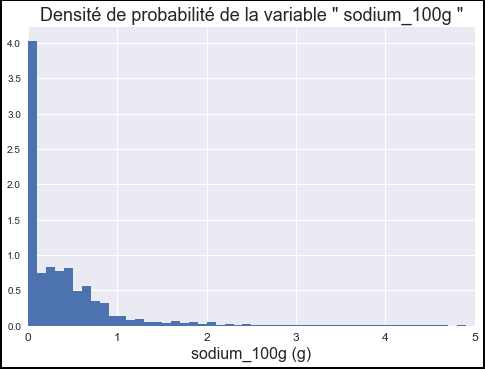

In [65]:
histogramme('sodium_100g', type_variable='continue', density=True, min_x=0, max_x=5, n_bins=1000, unite='g')

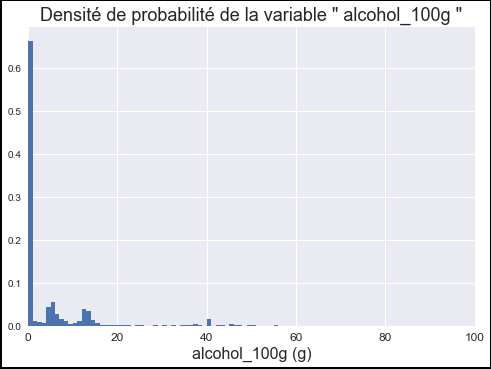

In [66]:
histogramme('alcohol_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100, unite='g')

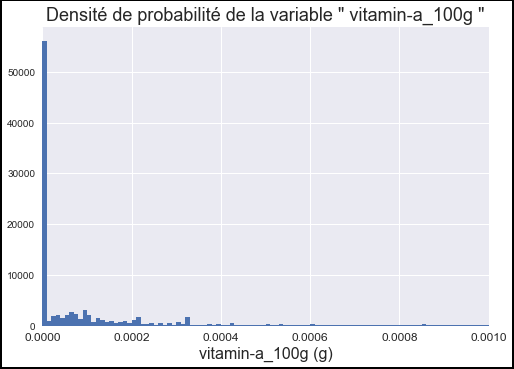

In [67]:
histogramme('vitamin-a_100g', type_variable='continue', density=True, min_x=0, max_x=0.001, n_bins=1000, unite='g')

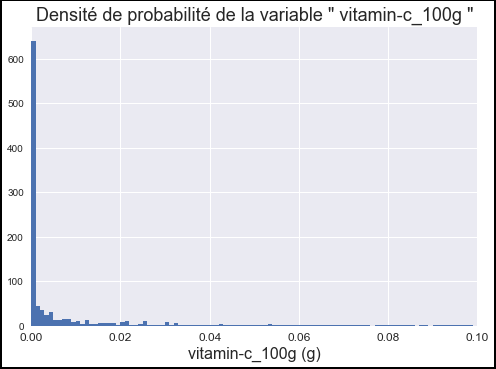

In [68]:
histogramme('vitamin-c_100g', type_variable='continue', density=True, min_x=0, max_x=0.1, n_bins=1000, unite='g')

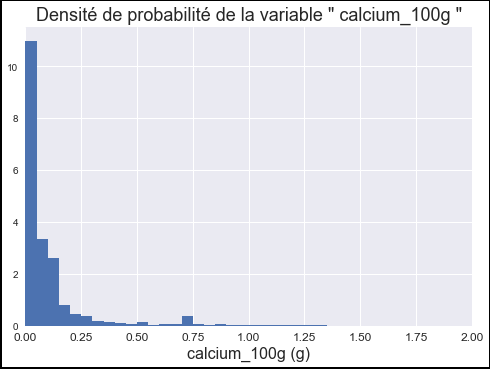

In [69]:
histogramme('calcium_100g', type_variable='continue', density=True, min_x=0, max_x=2, n_bins=2000, unite='g')

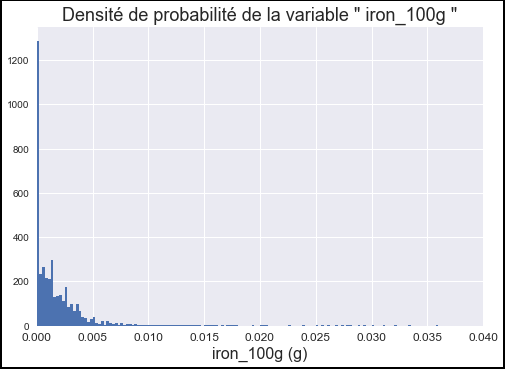

In [70]:
histogramme('iron_100g', type_variable='continue', density=True, min_x=0, max_x=0.04, n_bins=400, unite='g')

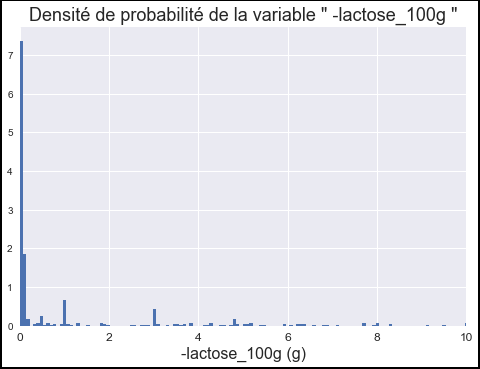

In [71]:
histogramme('-lactose_100g', type_variable='continue', density=True, min_x=0, max_x=10, n_bins=1000, unite='g')

#### Variables qualitatives

##### nutriscore_grade

In [72]:
ser = df1['nutriscore_grade'].value_counts().sort_index()
display(ser)

a    106066
b     83995
c    140397
d    205577
e    124285
Name: nutriscore_grade, dtype: int64

In [73]:
df1['nutriscore_grade'].notnull().sum()

660320

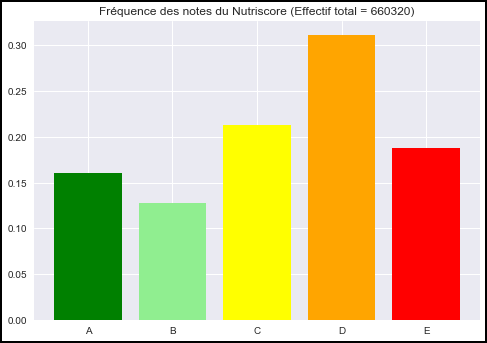

In [74]:
# barplot normalisé
ser = df1['nutriscore_grade'].value_counts(normalize=True).sort_index()
plt.style.use('seaborn')
plt.figure(edgecolor='black', linewidth=4)
plt.bar(ser.index,
        ser.values,
        color=['green', 'lightgreen', 'yellow', 'orange', 'red'])
plt.title(
    label=
    f"Fréquence des notes du Nutriscore (Effectif total = {str(df1['nutriscore_grade'].notnull().sum())})"
)
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['A', 'B', 'C', 'D', 'E'])
plt.show()

##### pnns_groups_1

In [75]:
ser = df1['pnns_groups_1'].value_counts().sort_index()
ser

Beverages                    64585
Cereals and potatoes         79159
Composite foods              52294
Fat and sauces               67281
Fish Meat Eggs               90503
Fruits and vegetables        46057
Milk and dairy products      87520
Salty snacks                 31928
Sugary snacks               140948
cereals-and-potatoes            56
fruits-and-vegetables         7330
salty-snacks                     6
sugary-snacks                 5365
unknown                    1082602
Name: pnns_groups_1, dtype: int64

In [76]:
# suppression des 'unknown' pour faciliter la normalisation
ser = df1['pnns_groups_1'].copy()
ser = ser[ser != 'unknown']
ser = ser.value_counts(normalize=True).sort_index(ascending=False)
ser

sugary-snacks              0.007971
salty-snacks               0.000009
fruits-and-vegetables      0.010891
cereals-and-potatoes       0.000083
Sugary snacks              0.209422
Salty snacks               0.047439
Milk and dairy products    0.130038
Fruits and vegetables      0.068432
Fish Meat Eggs             0.134471
Fat and sauces             0.099967
Composite foods            0.077699
Cereals and potatoes       0.117616
Beverages                  0.095961
Name: pnns_groups_1, dtype: float64

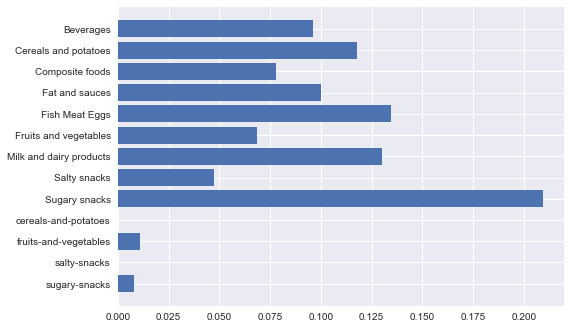

In [77]:
# barplot normalisé
plt.style.use('seaborn')
plt.barh(ser.index, ser.values)
plt.xticks()  #(rotation=0)
plt.show()

##### pnns_groups_2

In [78]:
ser = df1['pnns_groups_2'].value_counts().sort_index()
ser

Alcoholic beverages                   15646
Appetizers                            10729
Artificially sweetened beverages       9128
Biscuits and cakes                    60590
Bread                                 21077
Breakfast cereals                      8922
Cereals                               37796
Cheese                                43499
Chocolate products                    13889
Dairy desserts                         6541
Dressings and sauces                  47118
Dried fruits                           5657
Eggs                                   3291
Fats                                  20163
Fish and seafood                      24677
Fruit juices                           8880
Fruit nectars                          1188
Fruits                                15887
Ice cream                              6511
Legumes                                8571
Meat                                  26825
Milk and yogurt                       30969
Nuts                            

In [79]:
# suppression des 'unknown' pour faciliter la normalisation
ser = df1['pnns_groups_2'].copy()
ser = ser[ser != 'unknown']
ser = ser.value_counts(normalize=True).sort_index(ascending=False)
ser

vegetables                          0.010184
pastries                            0.007783
nuts                                0.000009
legumes                             0.000028
fruits                              0.000450
cereals                             0.000054
Waters and flavored waters          0.008999
Vegetables                          0.031686
Unsweetened beverages               0.014278
Teas and herbal teas and coffees    0.002249
Sweets                              0.096430
Sweetened beverages                 0.032433
Soups                               0.003876
Sandwiches                          0.005671
Salty and fatty products            0.019707
Processed meat                      0.050024
Potatoes                            0.004052
Plant-based milk substitutes        0.007889
Pizza pies and quiches              0.000897
Pizza pies and quiche               0.010399
One-dish meals                      0.059796
Offals                              0.001783
Nuts      

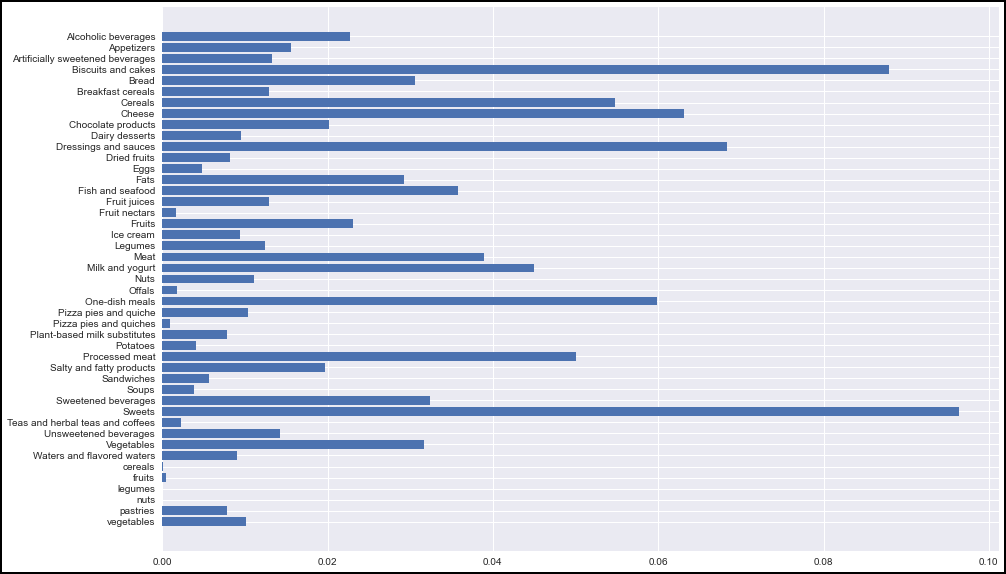

In [80]:
# barplot normalisé
plt.figure(figsize=(15, 10), edgecolor='black', linewidth=4)
plt.style.use('seaborn')
plt.barh(ser.index, ser.values)
plt.yticks(size=10)
plt.show()

##### creator

In [81]:
ser = df1['creator'].value_counts(normalize=True, ascending=True)
ser[-20:]

halal-app-chakib              0.001764
foodless                      0.001882
foodrepo                      0.001896
veganeamos                    0.002743
nutrinet-sante                0.002762
tacinte                       0.003212
swipe-studio                  0.003990
waistline-app                 0.004109
foodvisor                     0.004601
tacite                        0.004887
prepperapp                    0.005682
sebleouf                      0.005816
openfood-ch-import            0.006463
inf                           0.006917
date-limite-app               0.017597
elcoco                        0.018809
org-database-usda             0.075908
openfoodfacts-contributors    0.092026
usda-ndb-import               0.095817
kiliweb                       0.563251
Name: creator, dtype: float64

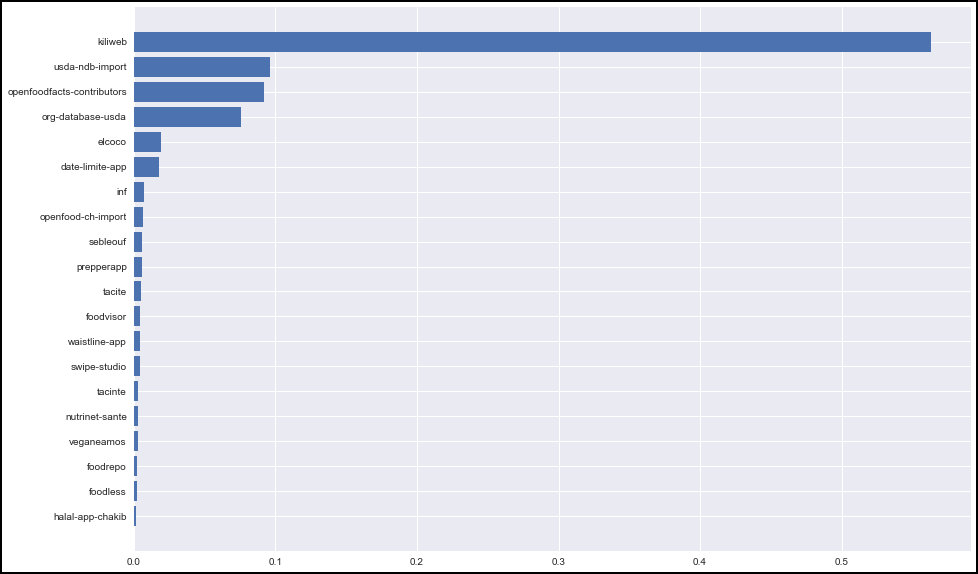

In [82]:
# barplot normalisé des 20 plus gros contributeurs à openfooodfacts
plt.figure(figsize=(15, 10), edgecolor='black', linewidth=4)
plt.style.use('seaborn')
plt.barh(ser.index[-20:], ser.values[-20:])
plt.yticks(size=10)
plt.show()

Note : le contributeur kiliweb est Yuca.

## Analyse bivariée des variables quantitatives du dataframe df1

### Fonction scatter_plot()

Retourne un scatter plot pour deux variables (colonnes) du df1

Arguments :

    - ser_x : série en abcisse.
    - ser_y : série en ordonnée.
    - min_x : valeur min représentée en abcisse.
    - max_x : valeur max représentée en abcisse.
    - min_y : valeur min représentée en ordonnée.
    - max_y : valeur max représentée en ordonnée.
    - alpha : transparence de chaque point.  
    - unite_x : string indiquant l'unité de la série en abcisse.  
    - unite_y : string indiquant l'unité de la série en ordonnée.    

In [83]:
def scatter_plot(ser_x,
                 ser_y,
                 min_x=0,
                 max_x=100,
                 min_y=0,
                 max_y=100,
                 alpha=0.002,
                 unite_x=None,
                 unite_y=None):

    # filtration des valeurs aberrantes. On exclue les valeurs à l'extérieur de l'intervalle [min_x, max_x], considérées comme aberrantes.
    largeur_x = max_x - min_x
    largeur_y = max_y - min_y

    def f_bool(x, min, max):
        if np.isnan(x):
            return False
        elif x < min:
            return False
        elif x > max:
            return False
        else:
            return True

    ser_x_bool = ser_x.apply(lambda x: f_bool(x, min_x, max_x)
                             )  # vaut True pour les valeurs non aberrantes
    ser_y_bool = ser_y.apply(lambda y: f_bool(y, min_y, max_y))
    ser_xy_bool = ser_x_bool & ser_y_bool  # vaut True pour les valeurs non aberrantes de ser_x et de ser_y, sinon vaut False
    # ser_x et ser_y sont les séries tracées
    ser_x = ser_x[ser_xy_bool]
    ser_y = ser_y[ser_xy_bool]
    total_count = ser_xy_bool.sum()

    # plotting scatter plot
    plt.style.use('seaborn')
    plt.figure(edgecolor='black', linewidth=4)
    plt.scatter(
        ser_x, ser_y, s=1,
        alpha=alpha)  # la valeur mini de alpha autorisée par pyplot est 0.002
    plt.xlabel(ser_x.name)
    plt.ylabel(ser_y.name)
    plt.title(label='Diagramme de dispersion (Effectif total = ' +
              str(int(total_count)) + ')')
    plt.ylim(min_y - largeur_y / 20, max_y + largeur_y / 20)
    label_x = ser_x.name if unite_x is None else ser_x.name + f" ({unite_x})"
    plt.xlabel(label_x)
    label_y = ser_y.name if unite_y is None else ser_y.name + f" ({unite_y})"
    plt.ylabel(label_y)

    # régression linéaire
    slope, intercept, r, p, std_err = reg_lin(ser_x, ser_y)
    model_x = pd.Series([min_x, max_x])
    model_y = slope * model_x + intercept
    plt.plot(model_x,
             model_y,
             color='r',
             linewidth=1,
             marker=None,
             linestyle='-')

    plt.annotate(
        text="Régression linéaire : y = {0:0.4f}*x + {1:0.4f}, R²={2:0.2f}".
        format(slope, intercept, r * r),
        xy=(min_x + largeur_x / 20, max_y - largeur_y / 20),
        color='red',
        size=10)
    plt.show()

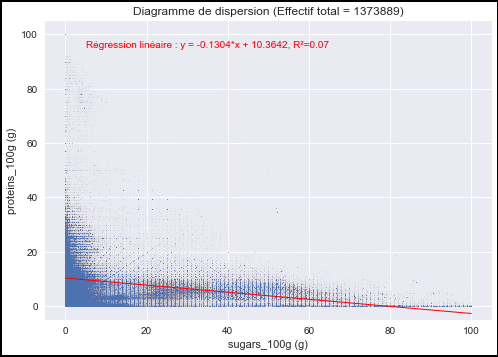

In [84]:
# test de scatter_plot()
scatter_plot(ser_x=df1['sugars_100g'], ser_y=df1['proteins_100g'], unite_x='g', unite_y='g')

### Tracé de scatter plots pour des variables quantitatives continues

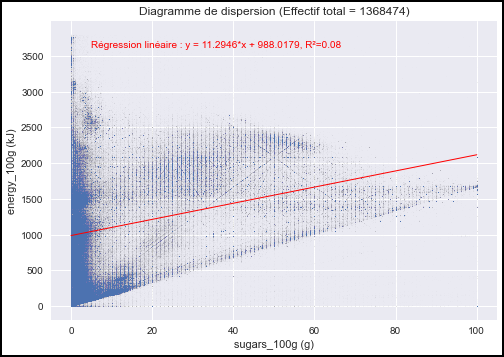

In [85]:
scatter_plot(df1['sugars_100g'], df1['energy_100g'], max_y=3800, unite_x='g', unite_y='kJ')

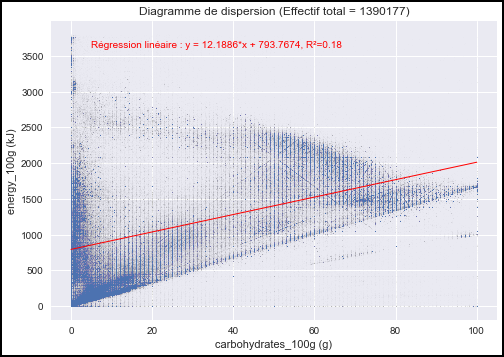

In [86]:
scatter_plot(df1['carbohydrates_100g'], df1['energy_100g'], max_y=3800, unite_x='g', unite_y='kJ')

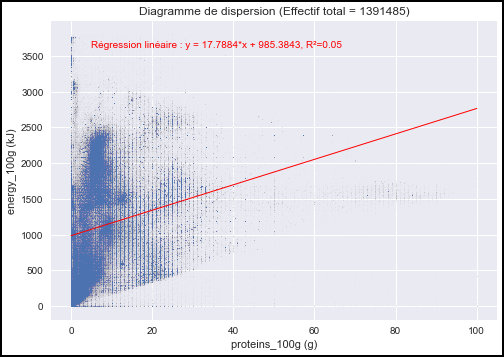

In [87]:
scatter_plot(df1['proteins_100g'], df1['energy_100g'], max_y=3800, unite_x='g', unite_y='kJ')

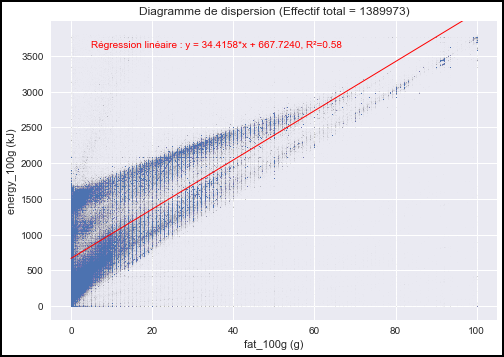

In [88]:
scatter_plot(df1['fat_100g'], df1['energy_100g'], max_y=3800, unite_x='g', unite_y='kJ')

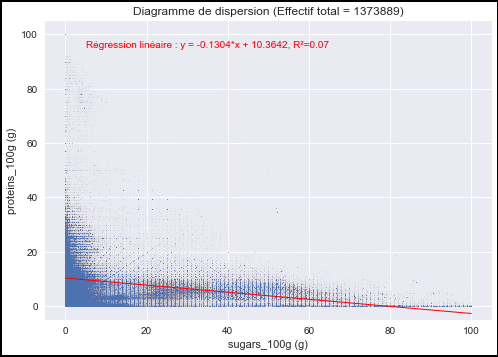

In [89]:
scatter_plot(df1['sugars_100g'], df1['proteins_100g'], unite_x='g', unite_y='g')

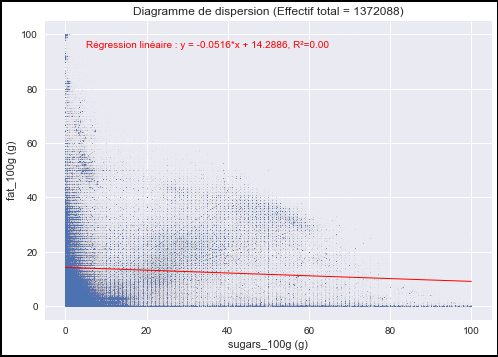

In [90]:
scatter_plot(df1['sugars_100g'], df1['fat_100g'], unite_x='g', unite_y='g')

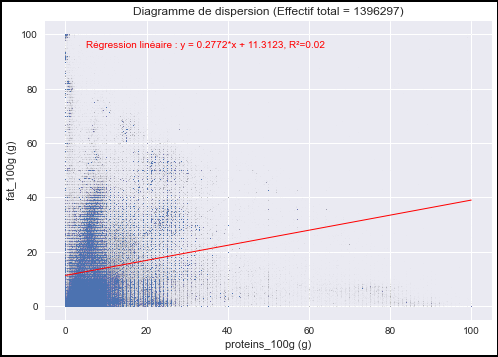

In [91]:
scatter_plot(df1['proteins_100g'], df1['fat_100g'], unite_x='g', unite_y='g')

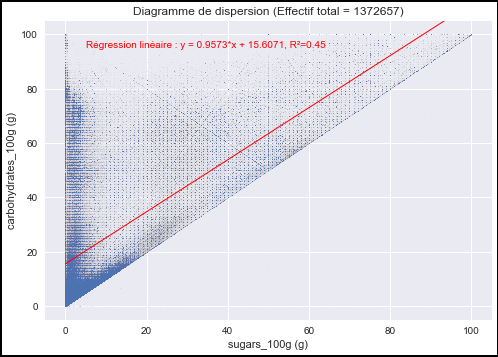

In [92]:
scatter_plot(df1['sugars_100g'], df1['carbohydrates_100g'], unite_x='g', unite_y='g')

Création de la série carbohydrates_not_sugars_100g

In [93]:
serie_carbohydrates_not_sugars_100g = df1['carbohydrates_100g'] - df1['sugars_100g']
serie_carbohydrates_not_sugars_100g.name = 'carbohydrates_not_sugars_100g'

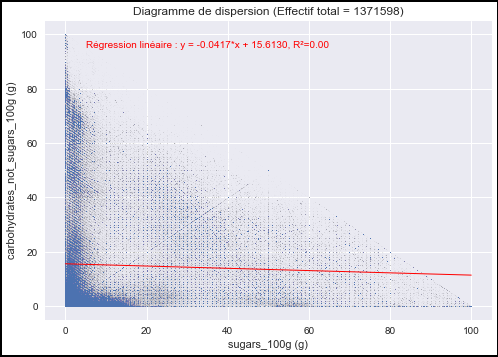

In [94]:
scatter_plot(df1['sugars_100g'], serie_carbohydrates_not_sugars_100g, unite_x='g', unite_y='g')

Création de la série serie_fat_not_saturated_100g

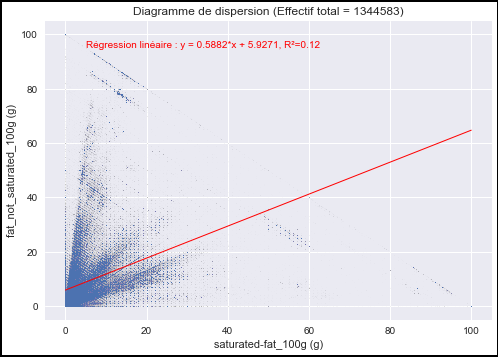

In [95]:
serie_fat_not_saturated_100g = df1['fat_100g'] - df1['saturated-fat_100g']
serie_fat_not_saturated_100g.name = 'fat_not_saturated_100g'
scatter_plot(df1['saturated-fat_100g'], serie_fat_not_saturated_100g, unite_x='g', unite_y='g')

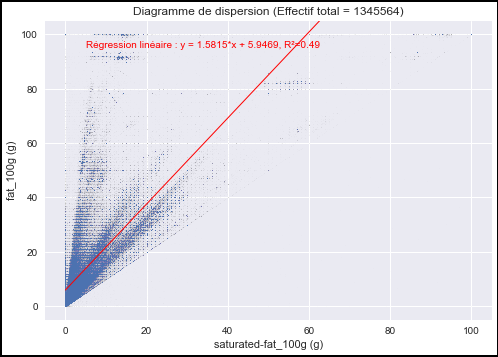

In [96]:
scatter_plot(df1['saturated-fat_100g'], df1['fat_100g'], unite_x='g', unite_y='g')

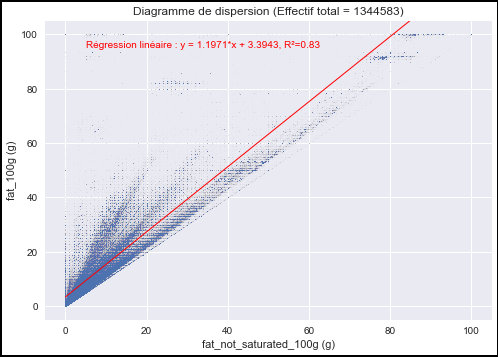

In [97]:
scatter_plot(serie_fat_not_saturated_100g, df1['fat_100g'], unite_x='g', unite_y='g')

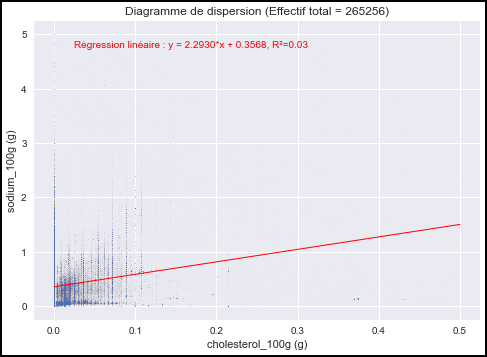

In [98]:
scatter_plot(df1['cholesterol_100g'], df1['sodium_100g'], min_x=0, max_x=0.5, min_y=0, max_y=5, unite_x='g', unite_y='g')

### Tracé de scatter plots avec le nutriscore et les variables qui le composent

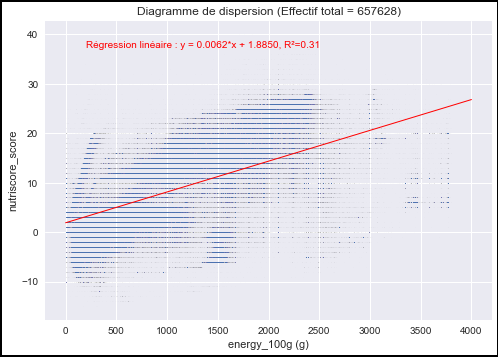

In [99]:
scatter_plot(df1['energy_100g'], df1['nutriscore_score'], min_x=0, max_x=4000, min_y=-15, max_y=40, unite_x='g')

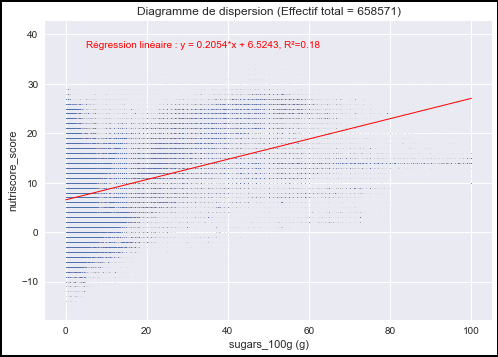

In [100]:
scatter_plot(df1['sugars_100g'], df1['nutriscore_score'], min_y=-15, max_y=40, unite_x='g')

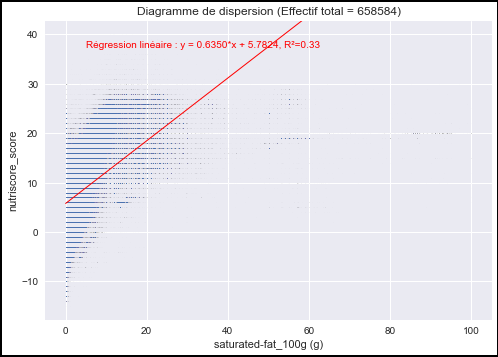

In [101]:
scatter_plot(df1['saturated-fat_100g'], df1['nutriscore_score'], min_y=-15, max_y=40, unite_x='g')

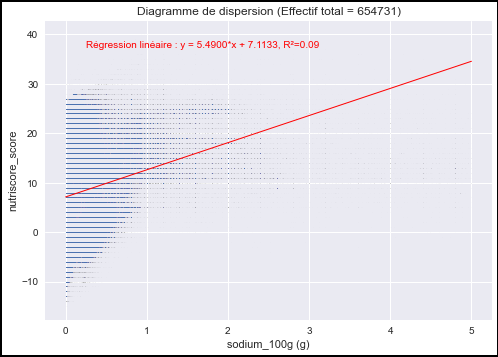

In [102]:
scatter_plot(df1['sodium_100g'], df1['nutriscore_score'], min_y=-15, max_y=40, max_x=5, unite_x='g')

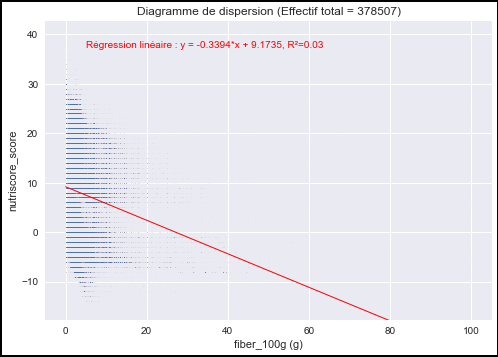

In [103]:
scatter_plot(df1['fiber_100g'], df1['nutriscore_score'], min_y=-15, max_y=40, unite_x='g')

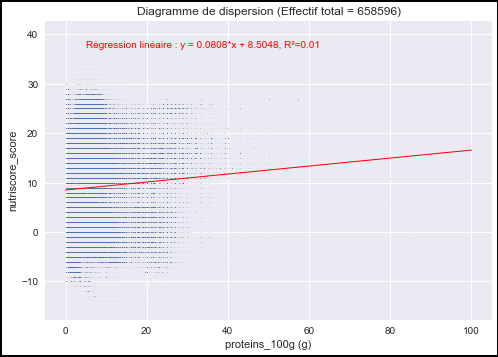

In [104]:
scatter_plot(df1['proteins_100g'], df1['nutriscore_score'], min_y=-15, max_y=40, unite_x='g')

### Recherche de corrélation par force brute sur les variables quantitatives

In [105]:
liste_series = [
                # les 6 séries (sur 7) utilisées dans le calcul du nutriscore
                [df1['energy_100g'], 0, 3800, 'kJ'],
                [df1['sugars_100g'], 0, 100, 'g'],
                [df1['saturated-fat_100g'], 0, 100, 'g'],
                [df1['sodium_100g'], 0, 5, 'g'],
                [df1['fiber_100g'], 0, 100, 'g'], 
                [df1['proteins_100g'], 0, 100, 'g'], 
                
                # autres séries
                [df1['carbohydrates_100g'], 0, 100, 'g'],
                [serie_carbohydrates_not_sugars_100g, 0, 100, 'g'], 
                [df1['fat_100g'], 0, 100, 'g'],
                [serie_fat_not_saturated_100g, 0, 100, 'g'], 
                [df1['cholesterol_100g'], 0, 0.5, 'g'],
    
                [df1['nutriscore_score'], -15, 40, None]]

'sugars_100g' en fonction de 'energy_100g' :


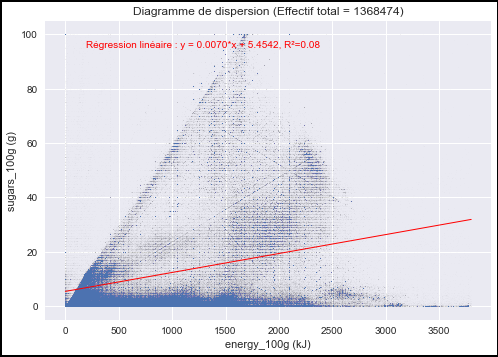

'saturated-fat_100g' en fonction de 'energy_100g' :


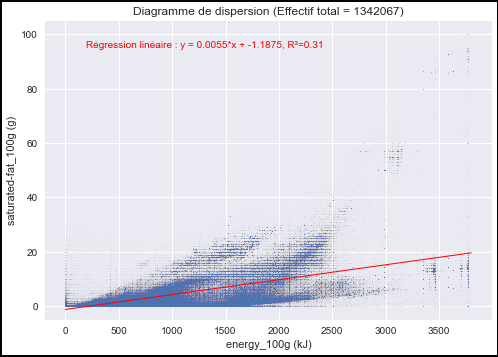

'sodium_100g' en fonction de 'energy_100g' :


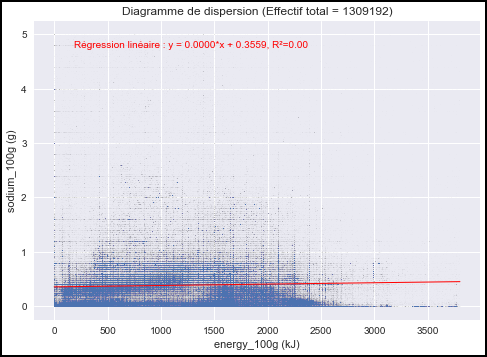

'fiber_100g' en fonction de 'energy_100g' :


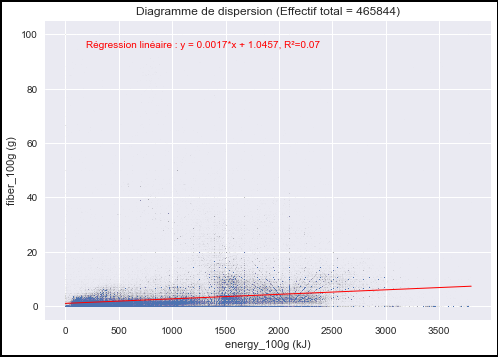

'proteins_100g' en fonction de 'energy_100g' :


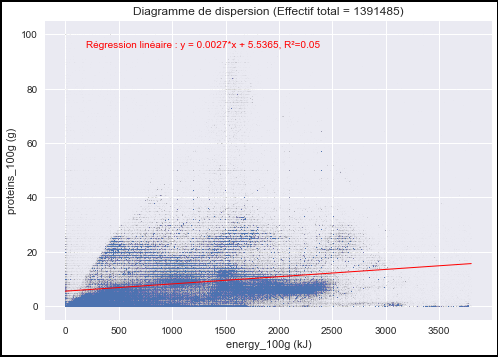

'carbohydrates_100g' en fonction de 'energy_100g' :


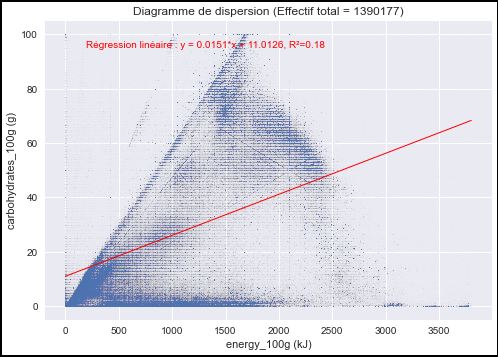

'carbohydrates_not_sugars_100g' en fonction de 'energy_100g' :


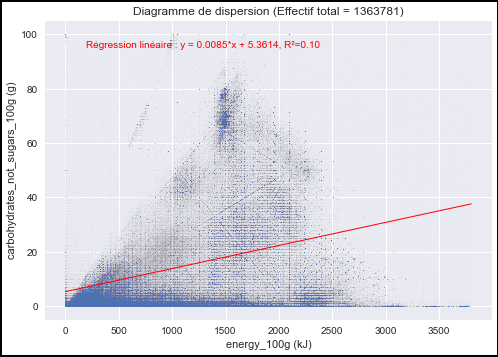

'fat_100g' en fonction de 'energy_100g' :


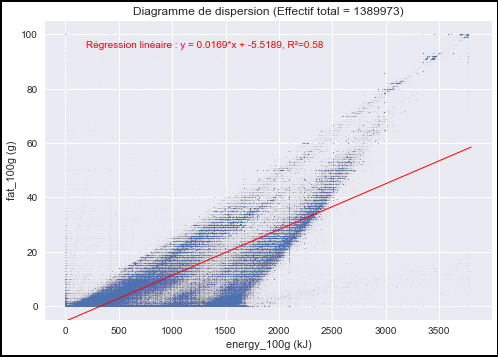

'fat_not_saturated_100g' en fonction de 'energy_100g' :


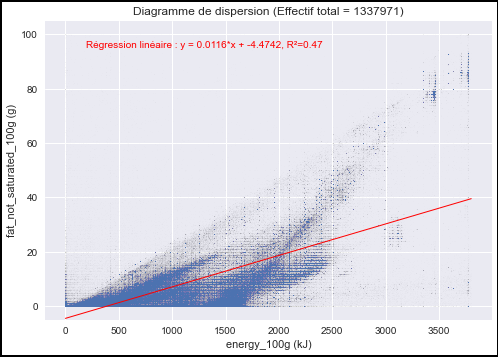

'cholesterol_100g' en fonction de 'energy_100g' :


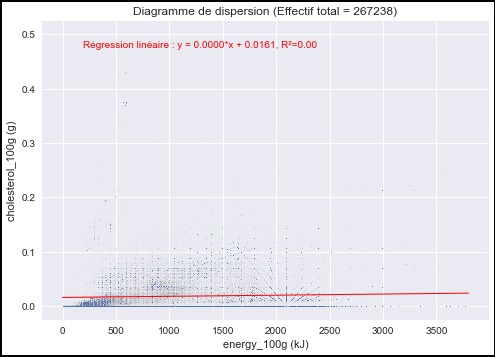

'nutriscore_score' en fonction de 'energy_100g' :


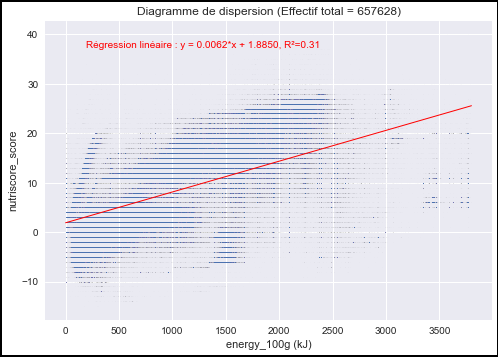

'saturated-fat_100g' en fonction de 'sugars_100g' :


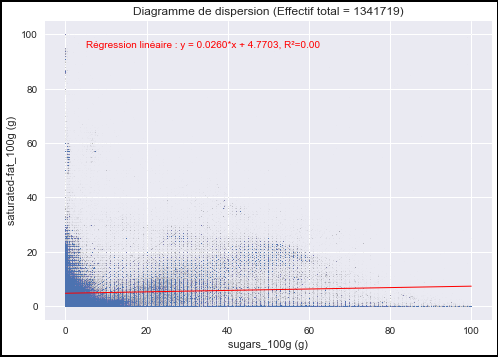

'sodium_100g' en fonction de 'sugars_100g' :


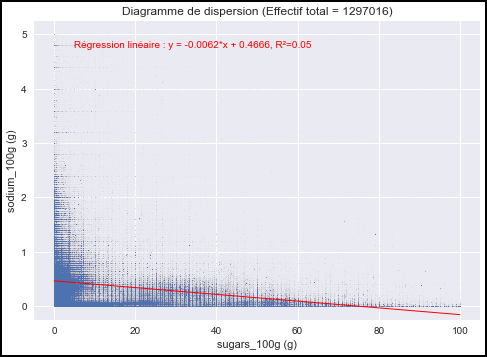

'fiber_100g' en fonction de 'sugars_100g' :


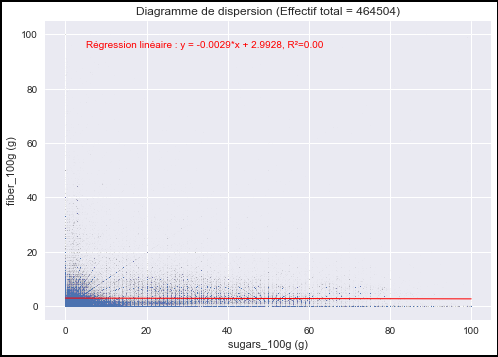

'proteins_100g' en fonction de 'sugars_100g' :


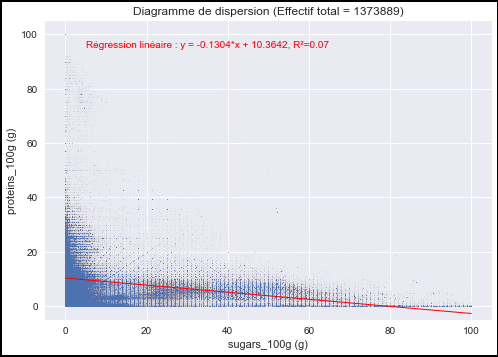

'carbohydrates_100g' en fonction de 'sugars_100g' :


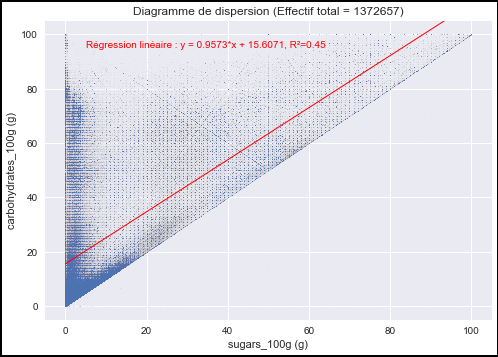

'carbohydrates_not_sugars_100g' en fonction de 'sugars_100g' :


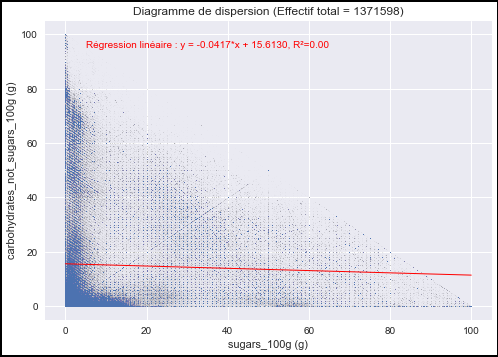

'fat_100g' en fonction de 'sugars_100g' :


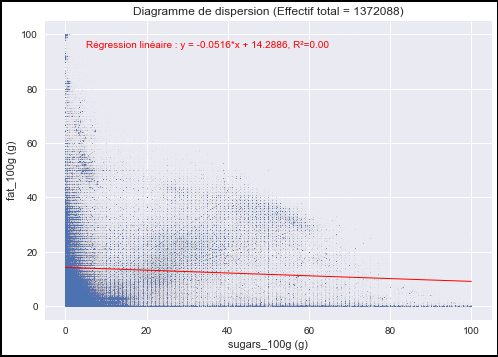

'fat_not_saturated_100g' en fonction de 'sugars_100g' :


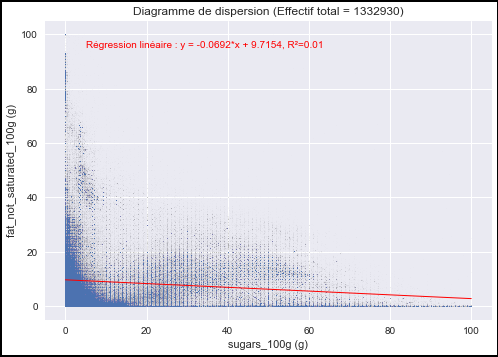

'cholesterol_100g' en fonction de 'sugars_100g' :


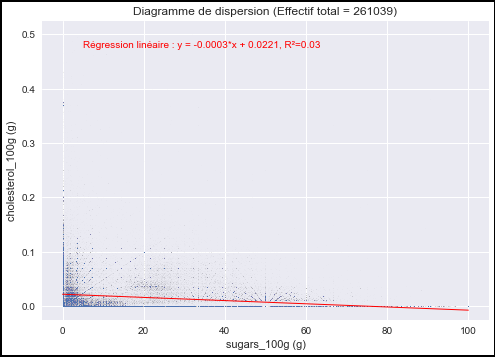

'nutriscore_score' en fonction de 'sugars_100g' :


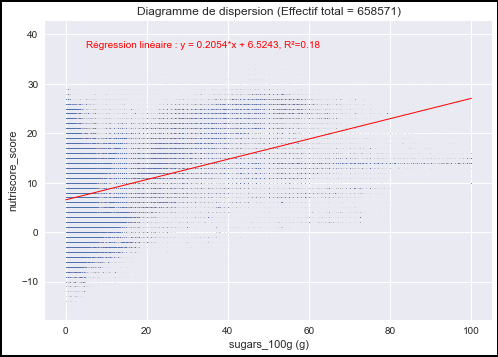

'sodium_100g' en fonction de 'saturated-fat_100g' :


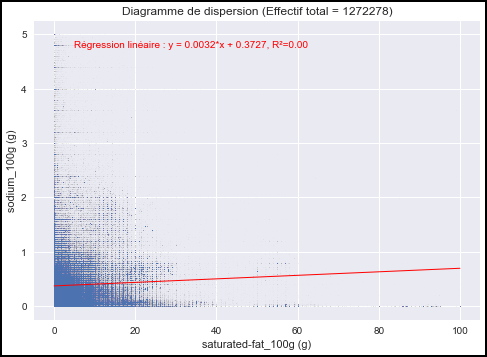

'fiber_100g' en fonction de 'saturated-fat_100g' :


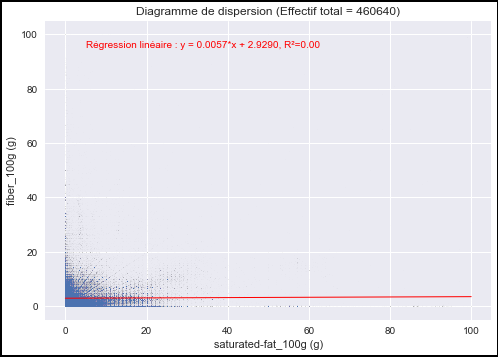

'proteins_100g' en fonction de 'saturated-fat_100g' :


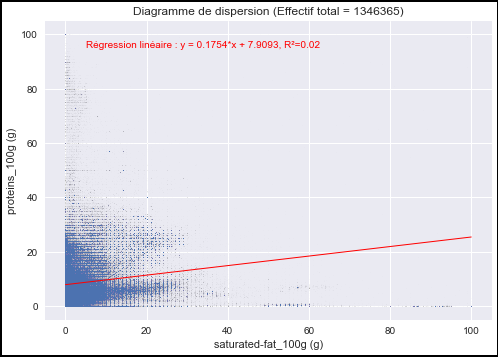

'carbohydrates_100g' en fonction de 'saturated-fat_100g' :


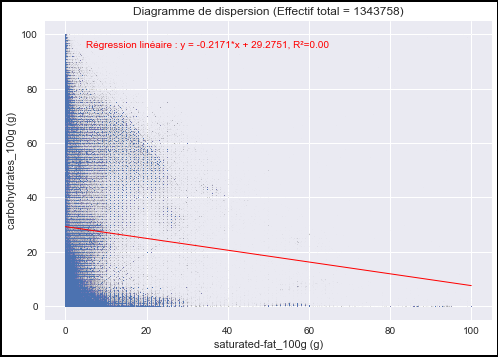

'carbohydrates_not_sugars_100g' en fonction de 'saturated-fat_100g' :


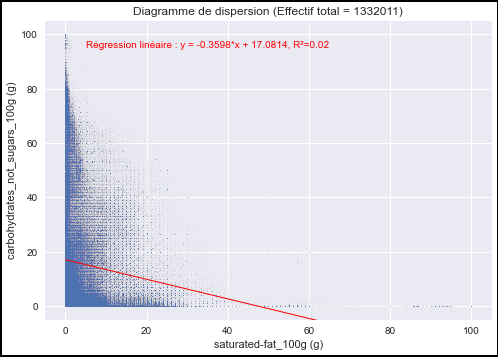

'fat_100g' en fonction de 'saturated-fat_100g' :


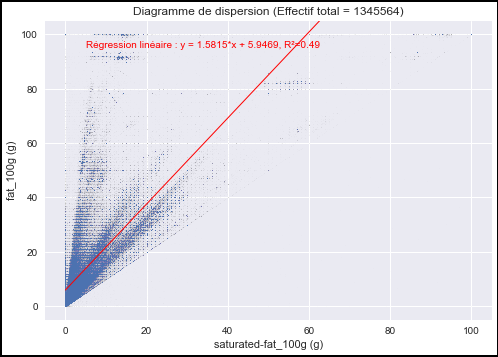

'fat_not_saturated_100g' en fonction de 'saturated-fat_100g' :


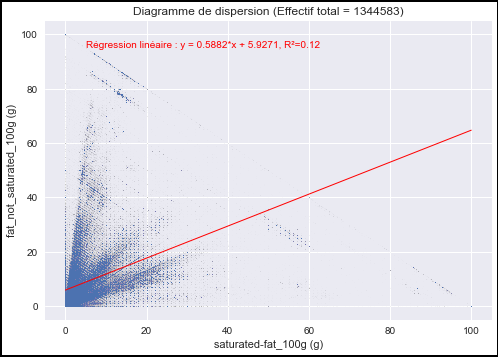

'cholesterol_100g' en fonction de 'saturated-fat_100g' :


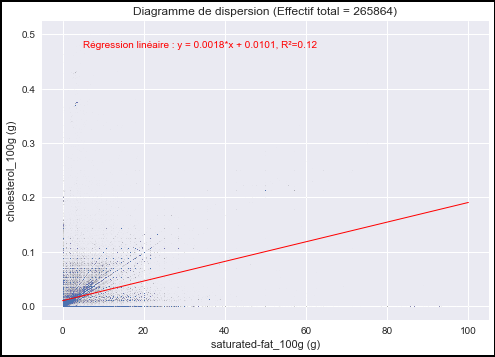

'nutriscore_score' en fonction de 'saturated-fat_100g' :


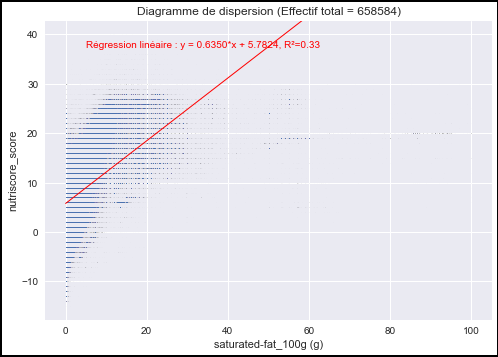

'fiber_100g' en fonction de 'sodium_100g' :


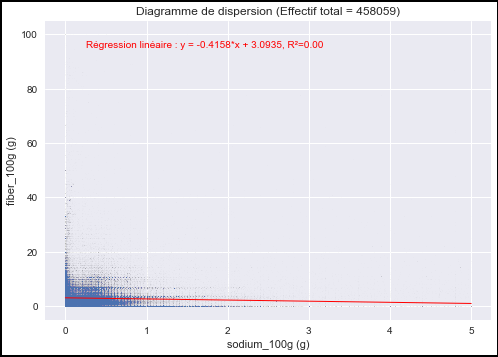

'proteins_100g' en fonction de 'sodium_100g' :


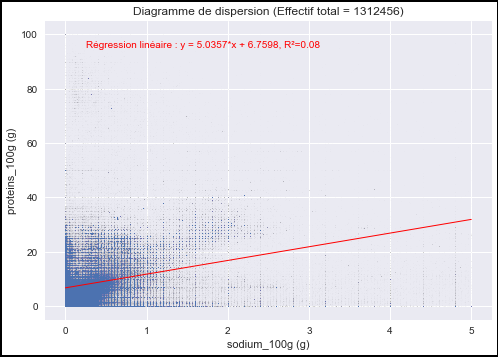

'carbohydrates_100g' en fonction de 'sodium_100g' :


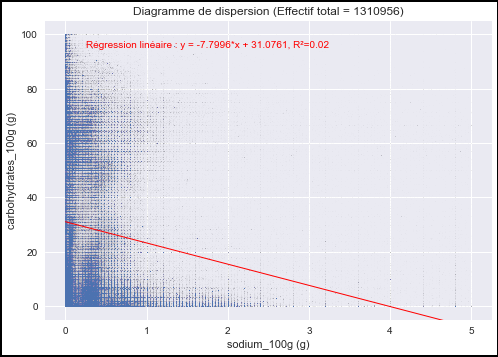

'carbohydrates_not_sugars_100g' en fonction de 'sodium_100g' :


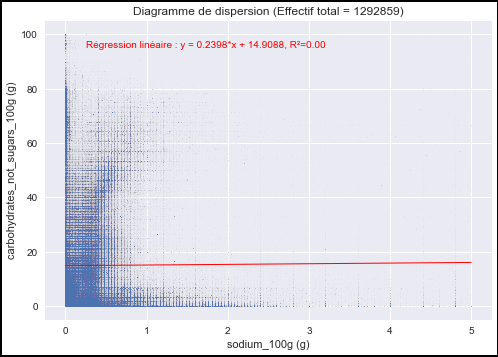

'fat_100g' en fonction de 'sodium_100g' :


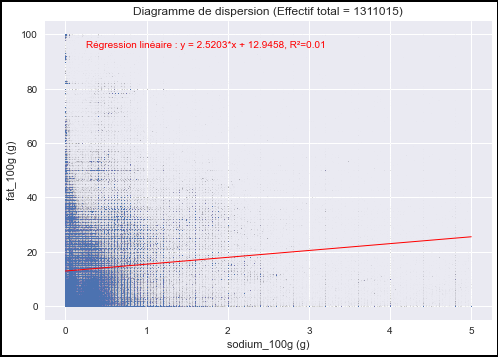

'fat_not_saturated_100g' en fonction de 'sodium_100g' :


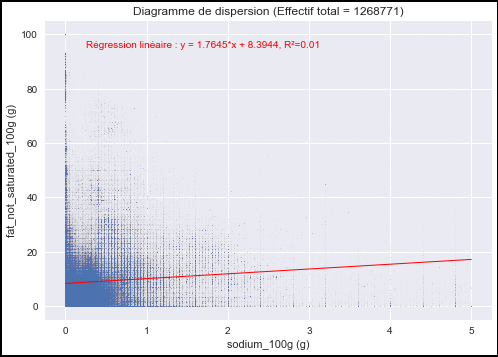

'cholesterol_100g' en fonction de 'sodium_100g' :


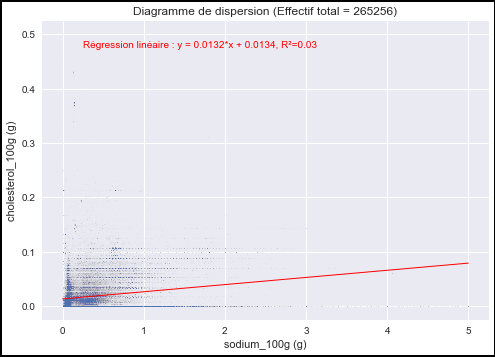

'nutriscore_score' en fonction de 'sodium_100g' :


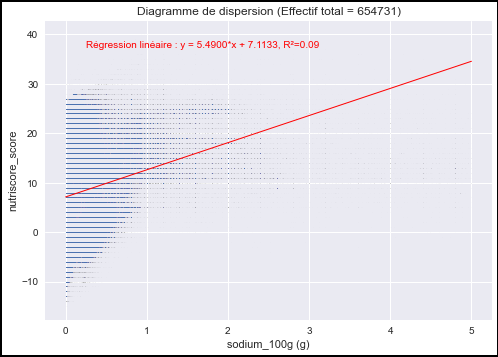

'proteins_100g' en fonction de 'fiber_100g' :


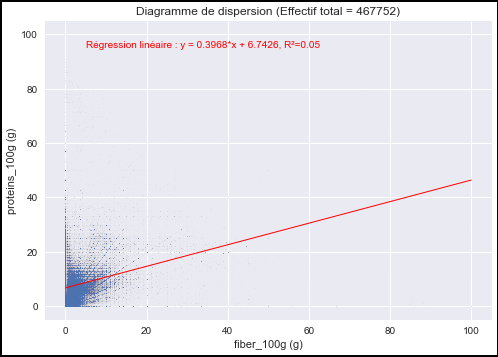

'carbohydrates_100g' en fonction de 'fiber_100g' :


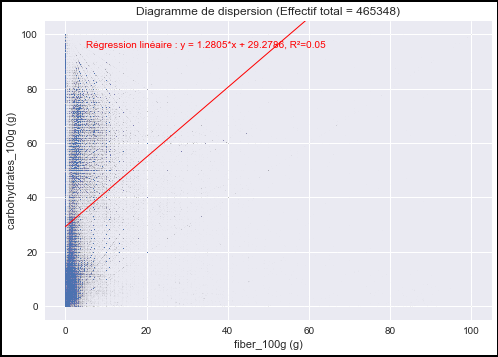

'carbohydrates_not_sugars_100g' en fonction de 'fiber_100g' :


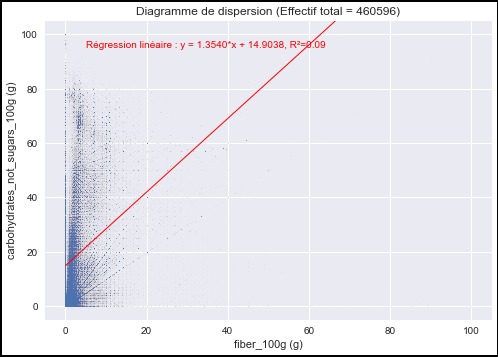

'fat_100g' en fonction de 'fiber_100g' :


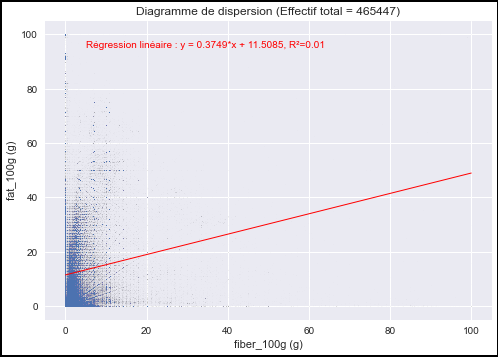

'fat_not_saturated_100g' en fonction de 'fiber_100g' :


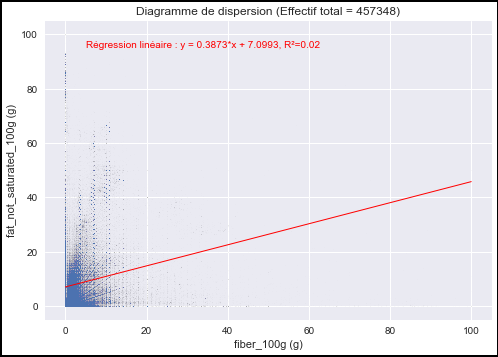

'cholesterol_100g' en fonction de 'fiber_100g' :


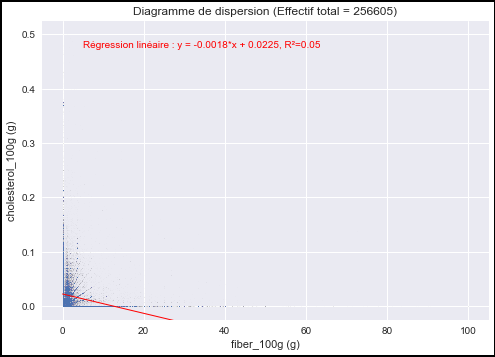

'nutriscore_score' en fonction de 'fiber_100g' :


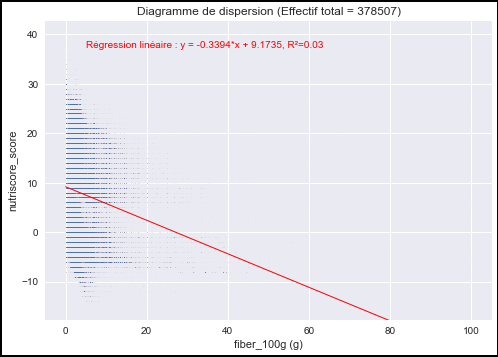

'carbohydrates_100g' en fonction de 'proteins_100g' :


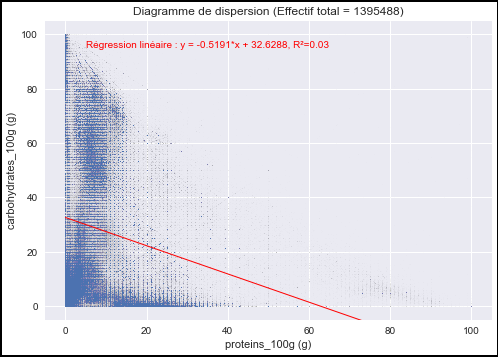

'carbohydrates_not_sugars_100g' en fonction de 'proteins_100g' :


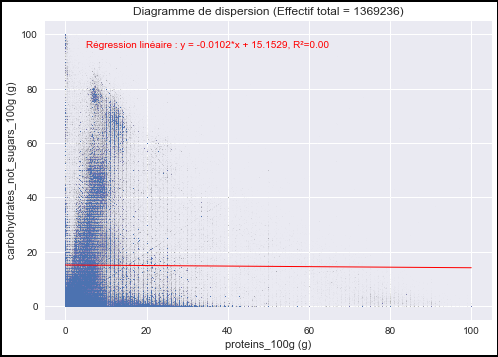

'fat_100g' en fonction de 'proteins_100g' :


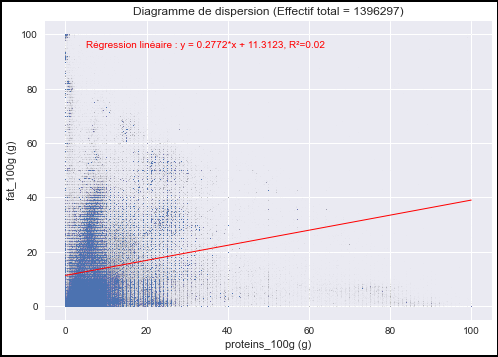

'fat_not_saturated_100g' en fonction de 'proteins_100g' :


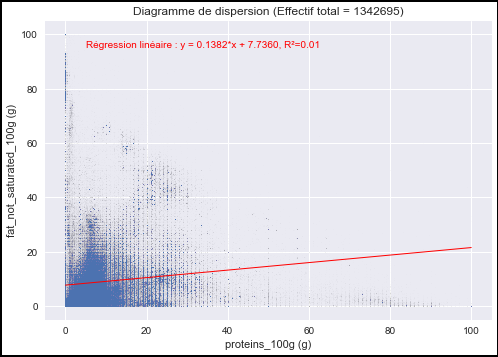

'cholesterol_100g' en fonction de 'proteins_100g' :


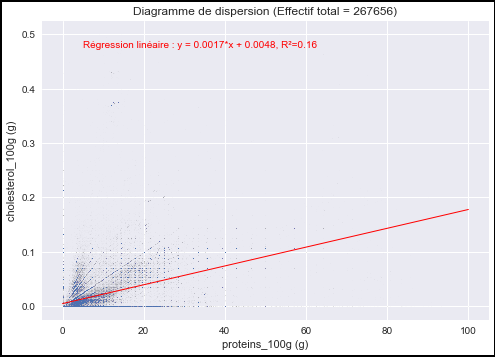

'nutriscore_score' en fonction de 'proteins_100g' :


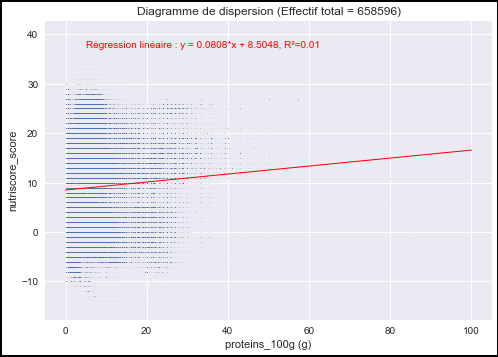

'carbohydrates_not_sugars_100g' en fonction de 'carbohydrates_100g' :


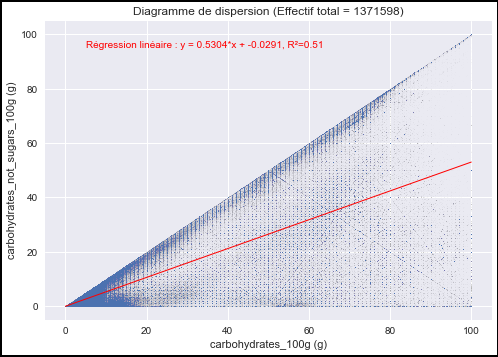

'fat_100g' en fonction de 'carbohydrates_100g' :


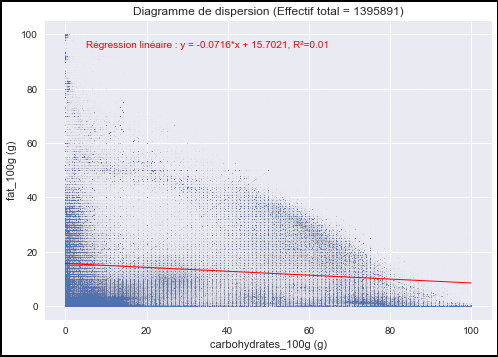

'fat_not_saturated_100g' en fonction de 'carbohydrates_100g' :


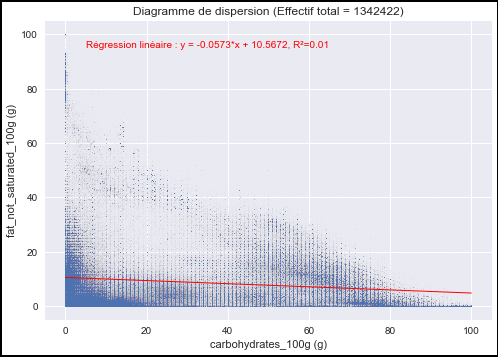

'cholesterol_100g' en fonction de 'carbohydrates_100g' :


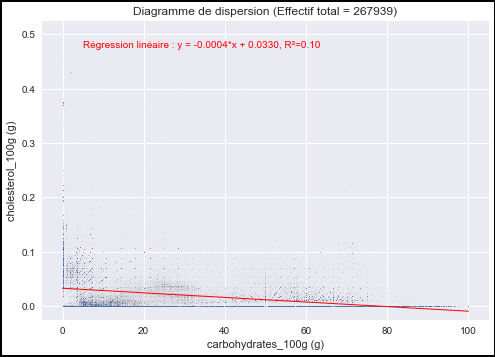

'nutriscore_score' en fonction de 'carbohydrates_100g' :


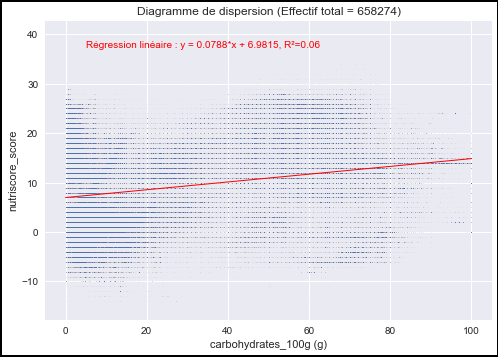

'fat_100g' en fonction de 'carbohydrates_not_sugars_100g' :


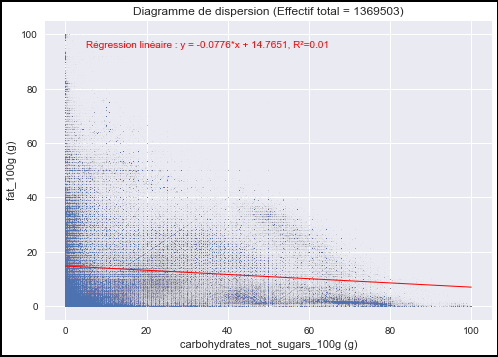

'fat_not_saturated_100g' en fonction de 'carbohydrates_not_sugars_100g' :


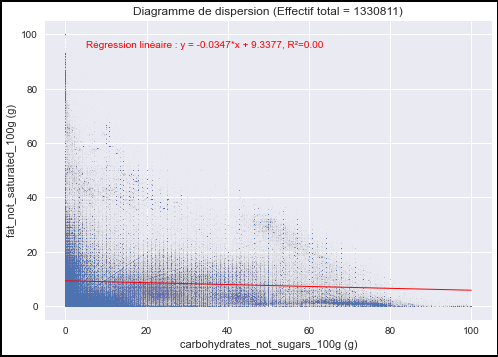

'cholesterol_100g' en fonction de 'carbohydrates_not_sugars_100g' :


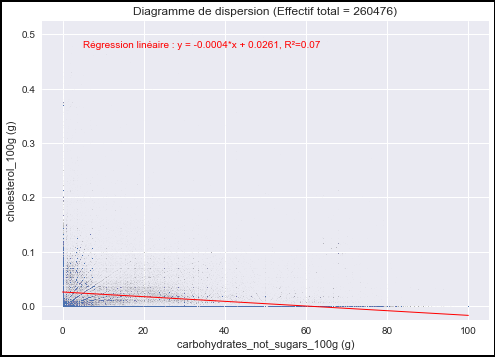

'nutriscore_score' en fonction de 'carbohydrates_not_sugars_100g' :


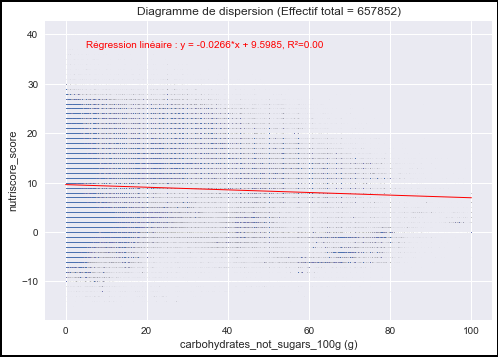

'fat_not_saturated_100g' en fonction de 'fat_100g' :


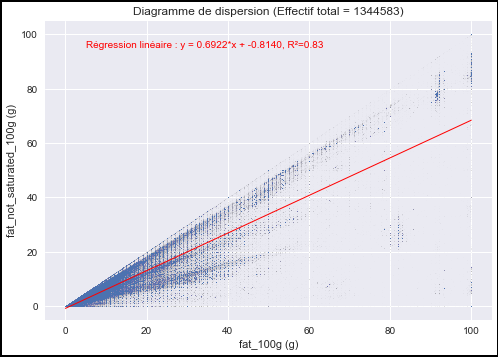

'cholesterol_100g' en fonction de 'fat_100g' :


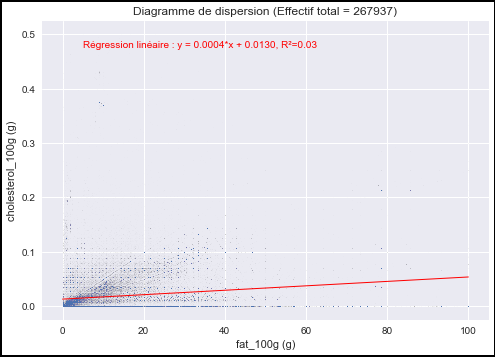

'nutriscore_score' en fonction de 'fat_100g' :


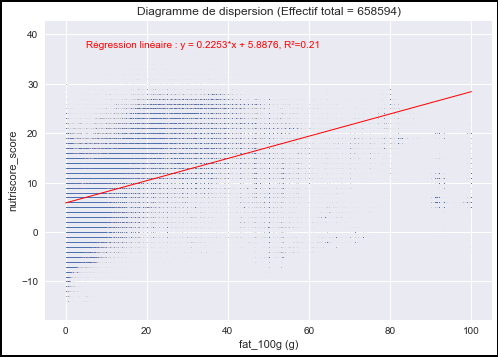

'cholesterol_100g' en fonction de 'fat_not_saturated_100g' :


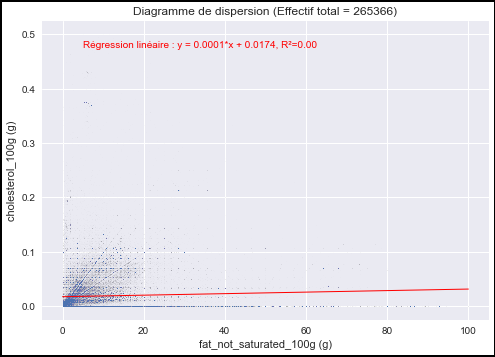

'nutriscore_score' en fonction de 'fat_not_saturated_100g' :


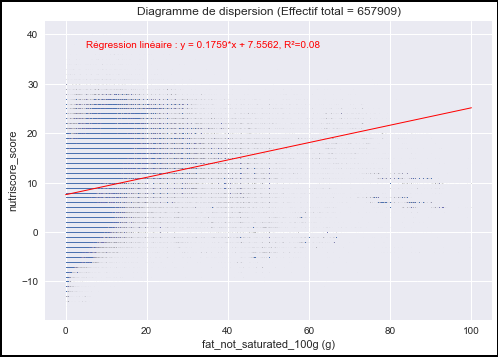

'nutriscore_score' en fonction de 'cholesterol_100g' :


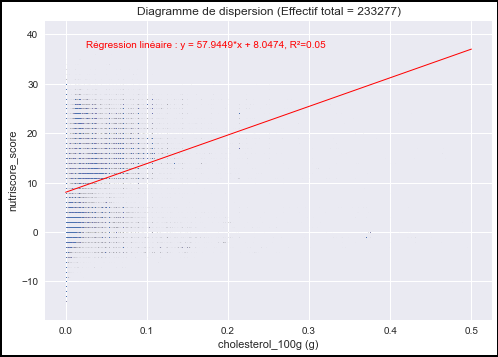

In [106]:
for x in range(0, len(liste_series)):
    for y in range(x+1, len(liste_series)):
        print(
            f"'{liste_series[y][0].name}' en fonction de '{liste_series[x][0].name}' :")
        scatter_plot(liste_series[x][0], liste_series[y][0], min_x=liste_series[x][1],
                     max_x=liste_series[x][2], min_y=liste_series[y][1], max_y=liste_series[y][2],
                    unite_x=liste_series[x][3], unite_y=liste_series[y][3])

### Matrice de corrélation (heatmap)

#### Calcul de la matrice de corrélation

In [107]:
liste_variables_corr = [
    'energy_100g', 'sugars_100g', 'saturated-fat_100g', 'salt_100g',
    'fiber_100g', 'proteins_100g', 'fat_100g', 'cholesterol_100g',
    '-lactose_100g', 'nutriscore_score'
]

In [108]:
frame = {}
for var in liste_variables_corr:
    frame[var] = df1[var]
df = pd.DataFrame(frame)
df_corr = df.corr()
print("Matrice de corrélation :")
display(df_corr)
del df

Matrice de corrélation :


energy_100g  sugars_100g  saturated-fat_100g  salt_100g  \
energy_100g            1.000000     0.280543            0.556785  -0.051950   
sugars_100g            0.280543     1.000000            0.064255  -0.092853   
saturated-fat_100g     0.556785     0.064255            1.000000  -0.006389   
salt_100g             -0.051950    -0.092853           -0.006389   1.000000   
fiber_100g             0.258884    -0.011540            0.008345  -0.009256   
proteins_100g          0.217904    -0.262704            0.140438   0.048799   
fat_100g               0.761817    -0.058386            0.697697  -0.018952   
cholesterol_100g       0.033440    -0.128284            0.265914   0.021713   
-lactose_100g          0.296489     0.549040            0.026659   0.071555   
nutriscore_score       0.557409     0.428968            0.573184   0.144885   

                    fiber_100g  proteins_100g  fat_100g  cholesterol_100g  \
energy_100g           0.258884       0.217904  0.761817          0.033440   
sugars_100g          -0.011540      -0.262704 -0.058386         -0.128284   
saturated-fat_100g    0.008345       0.140438  0.697697          0.265914   
salt_100g            -0.009256       0.048799 -0.018952          0.021713   
fiber_100g            1.000000       0.224028  0.116073         -0.172674   
proteins_100g         0.224028       1.000000  0.153328          0.310086   
fat_100g              0.116073       0.153328  1.000000          0.142738   
cholesterol_100g     -0.172674       0.310086  0.142738          1.000000   
-lactose_100g         0.024030       0.025801  0.113176          0.073759   
nutriscore_score     -0.167547       0.080943  0.461840          0.174609   

                    -lactose_100g  nutriscore_score  
energy_100g              0.296489          0.557409  
sugars_100g              0.549040          0.428968  
saturated-fat_100g       0.026659          0.573184  
salt_100g                0.071555          0.144885  
fiber_100g               0.024030         -0.167547  
proteins_100g            0.025801          0.080943  
fat_100g                 0.113176          0.461840  
cholesterol_100g         0.073759          0.174609  
-lactose_100g            1.000000          0.145149  
nutriscore_score         0.145149          1.000000

#### Représentation sous forme de heatmap

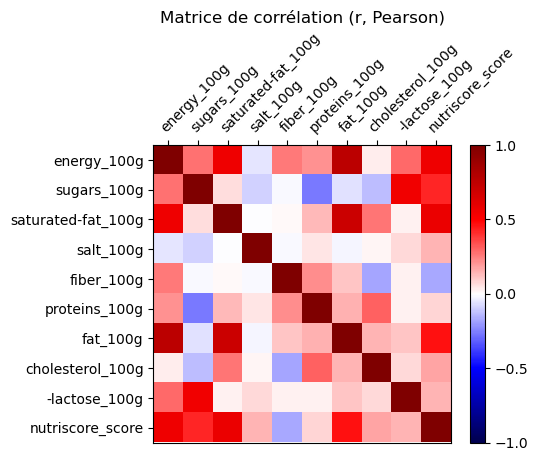

In [110]:
plt.style.use('default')
plt.matshow(df_corr, cmap='seismic', vmin=-1, vmax=1)
ticks = range(len(liste_variables_corr))
plt.xticks(ticks,
           labels=liste_variables_corr,
           rotation=45,
           rotation_mode='anchor',
           horizontalalignment='left')
plt.yticks(ticks, labels=liste_variables_corr)
plt.tick_params(bottom=False)
plt.colorbar(shrink=0.8, ticks=[-1, -0.5, 0, 0.5, 1])
plt.title('Matrice de corrélation (r, Pearson)')
plt.show()

## ANOVA sur des couples de variables quantitative et qualitative

### Fonction boites_moustache_multiples()

Retourne un boxplot pour une variable quantitative X, pour chaque modalité de la variable qualitative Y.
Marque la moyenne avec un point rouge.
Affiche la valeur de eta^2 (rapport de corrélation).

Arguments :  
- ser_x : série de la variable quantitative.
- ser_y : série de la variable qualitative.
- min_x : valeur min représentée en abcisse.  
- max_x : valeur max représentée en abcisse.  
- unite_x : string indiquant l'unité de la série en abcisse.  

In [111]:
def boites_moustaches_multiples(ser_x=df1['energy_100g'],
                                ser_y=df1['nutriscore_grade'],
                                min_x=0,
                                max_x=100,
                                unite_x=None):

    # listes pour stocker les valeurs issues de chaque classe :
    sers = []  # liste des séries tracées
    labels = []
    moyennes = []
    medianes = []
    variances = []
    effectifs = []

    # traitement du dataframe : données quanlitatives
    ser_y_values = sorted(list(ser_y.dropna().unique()))

    # filtration des valeurs aberrantes de ser_x. On exclue les valeurs à l'extérieur de l'intervalle [min_x, max_x] considérées comme aberrantes.
    largeur = max_x - min_x

    def f_bool_ser_x(x, min, max):
        if np.isnan(x):
            return False
        elif x < min:
            return False
        elif x > max:
            return False
        else:
            return True

    ser_x_bool = ser_x.apply(lambda x: f_bool_ser_x(x, min_x, max_x)
                             )  # vaut True pour les valeurs non aberrantes

    # calcul pour chaque valeur unique de ser_y
    for ser_y_value in ser_y_values:
        ser_y_bool = ser_y.apply(lambda y: y == ser_y_value)
        ser_xy_bool = ser_x_bool & ser_y_bool  # vaut True pour les valeurs non aberrantes de ser_x et lorsque ser_y vaut ser_y_value
        # ser_xy est la série tracée dans un boxplot spécifique à la valeur y
        ser_xy = ser_x[ser_xy_bool]
        moyenne = ser_xy.mean()
        mediane = ser_xy.median()
        variance = ser_xy.var()
        effectif = ser_xy_bool.sum()
        sers.append(ser_xy)
        labels.append(ser_y_value)
        moyennes.append(moyenne)
        medianes.append(mediane)
        variances.append(variance)
        effectifs.append(effectif)

    # calcul de eta² = SCE/SCT
    ser_y_bool = ser_y.apply(lambda y: y in ser_y_values)
    ser_xy_bool = ser_x_bool & ser_y_bool  # vaut True pour les valeurs non aberrantes de ser_x et de ser_y
    total_count = ser_xy_bool.sum()
    # ser_xy compile toutes les valeurs de x pour des lignes ser_x et ser_y non aberrantes
    ser_xy = ser_x[ser_xy_bool]
    moyenne_globale = ser_xy.mean()
    mediane_globale = ser_xy.median()
    # Sum of Squares of the Model / Somme des Carrés Expliqués
    SCE = 0
    for i in range(0, len(moyennes)):
        SCE += effectifs[i] * (moyennes[i] - moyenne_globale)**2
    # Sum of Squares of the Error / Somme des Carrés Résiduelle
    SCR = 0
    for i in range(0, len(variances)):
        SCR += effectifs[i] * variances[i]
    # SCT = total sum of squares
    SCT = SCE + SCR
    eta_2 = SCE / SCT

    # plotting boxplot
    plt.style.use('seaborn')
    plt.figure(edgecolor='black', linewidth=4)
    plt.boxplot(sers, vert=0)
    plt.xlim(min_x - 0.01 * largeur, max_x + 0.01 * largeur)
    plt.title(label='ANOVA : ' + ser_x.name + ' / ' + ser_y.name +
              ' (Effectif total : ' + str(total_count) + r'). $\eta²$' +
              ' = {0:0.2f}'.format(eta_2))
    y_coordinates = [x for x in range(1, len(labels) + 1)]
    plt.yticks(ticks=y_coordinates, labels=labels)
    plt.xlabel(ser_x.name)
    plt.ylabel(ser_y.name)
    label_x = ser_x.name if unite_x is None else ser_x.name + f" ({unite_x})"
    plt.xlabel(label_x)
    # plotting dot "moyenne"
    plt.plot(moyennes,
             y_coordinates,
             marker='o',
             markersize=10,
             color='red',
             linewidth=0)
    # plotting "moyenne_globale"
    plt.axvline(moyenne_globale, color='r', linewidth=0.5)
    plt.axvline(mediane_globale, color='g', linewidth=0.5)
    # show
    plt.show()

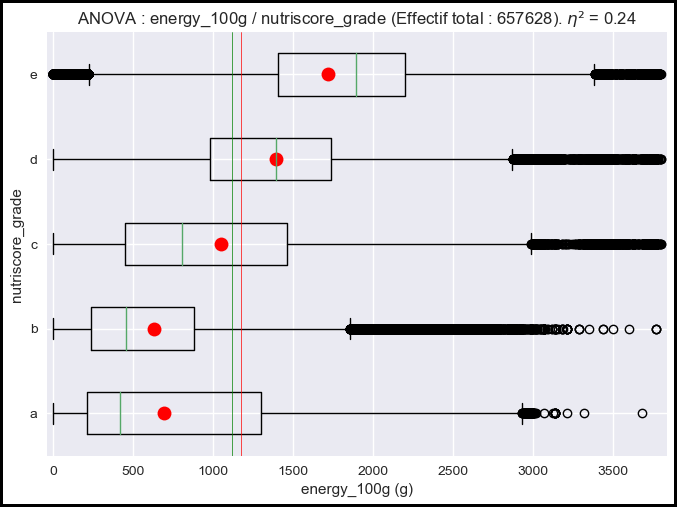

In [112]:
# test unitaire de boites_moustaches_multiples()
boites_moustaches_multiples(ser_x = df1['energy_100g'], ser_y = df1['nutriscore_grade'], min_x=0, max_x=3800, unite_x='g')

### Tracés des boxplots et ANOVAs des variables étudiées

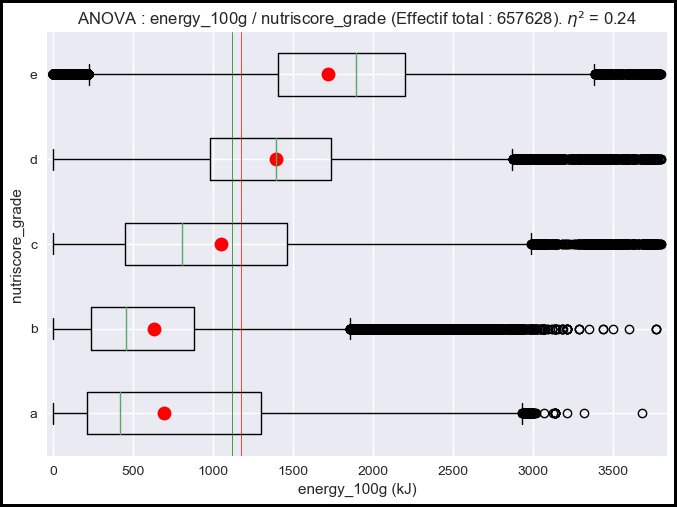

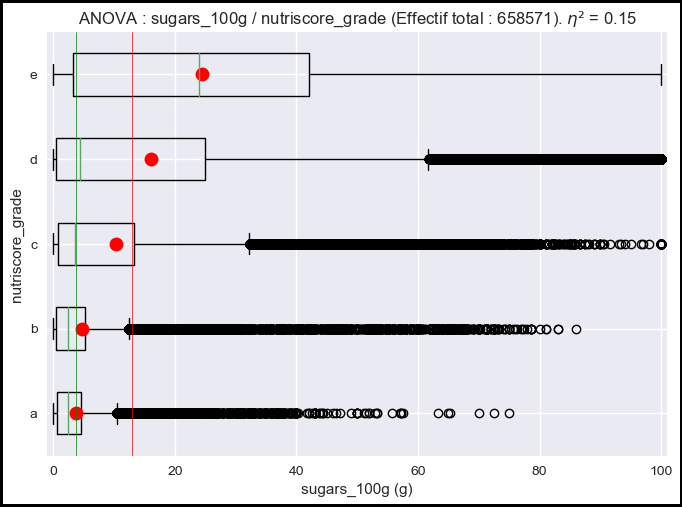

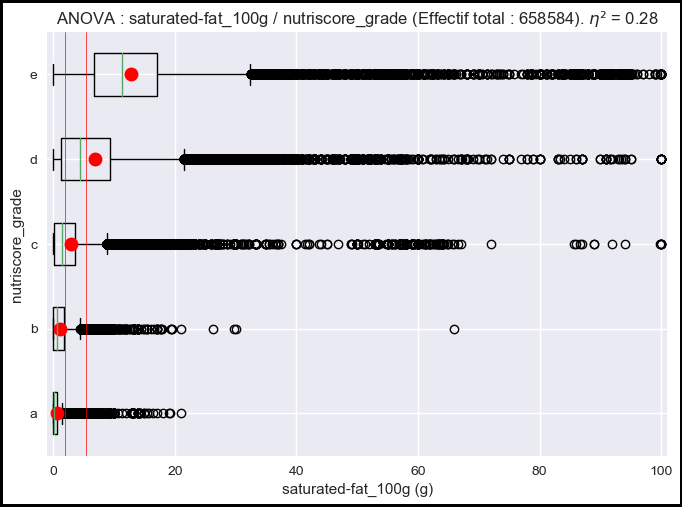

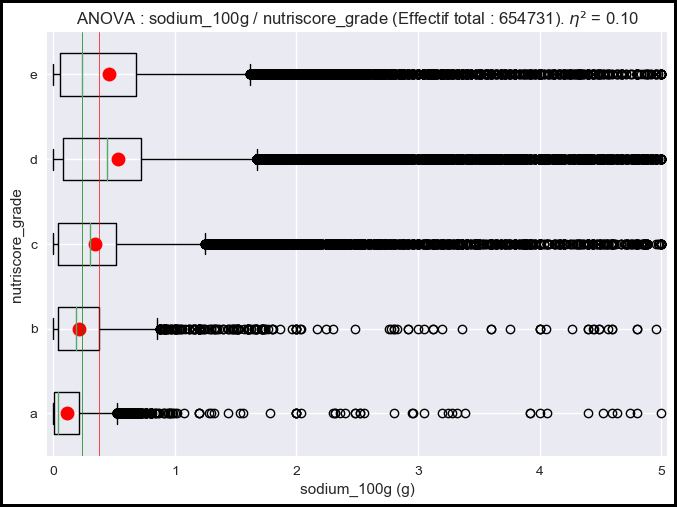

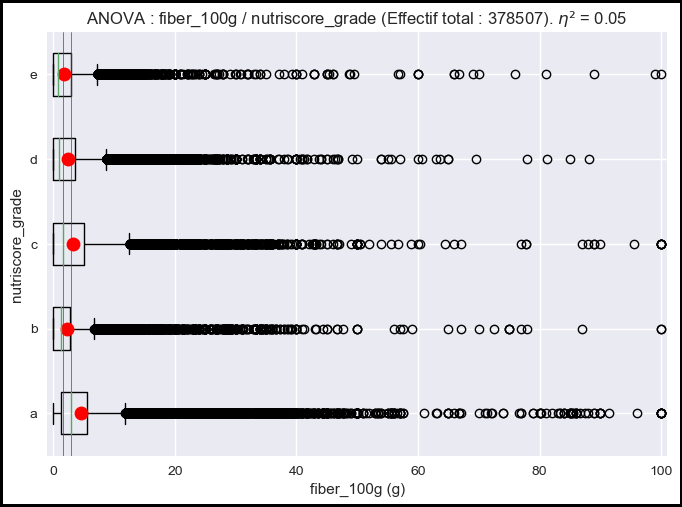

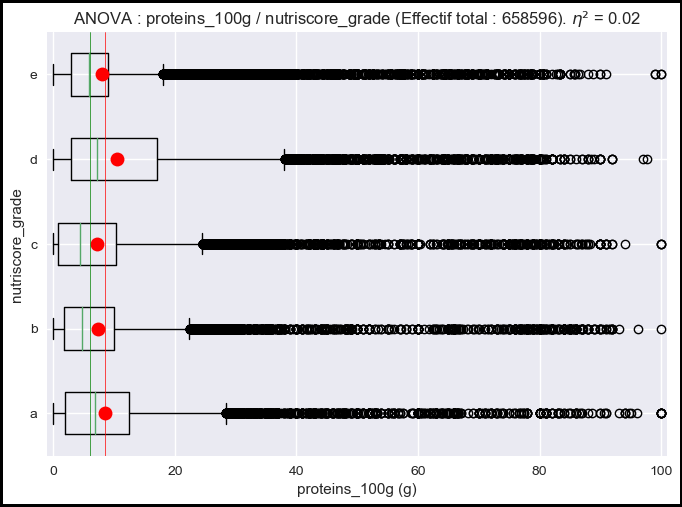

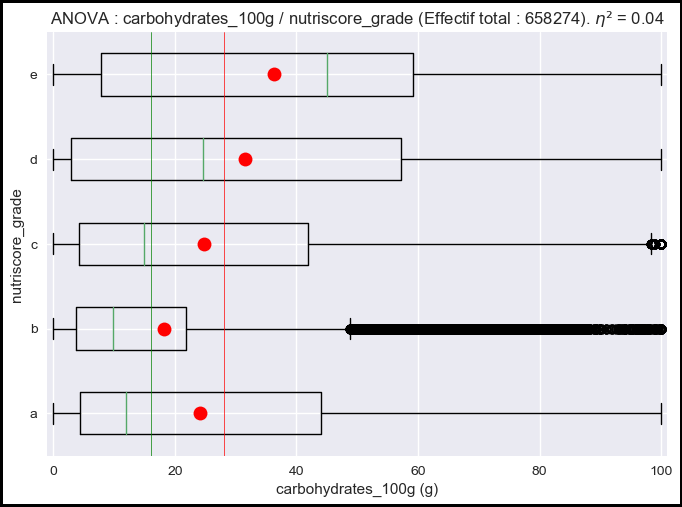

In [ ]:
for serie in liste_series :   
    boites_moustaches_multiples(ser_x=serie[0], ser_y=df1['nutriscore_grade'], min_x=serie[1], max_x=serie[2], unite_x=serie[3])

## Analyse en composantes principales

### Corrélations entre les variables utilisées pour le calcul du Nutriscore.

On analyse ici les corrélations entre les variables suivantes :  
    - les 6 variables disponibles pour calculer le Nutriscore (il manque la 7ème).  
    - le Nutriscore.  

In [ ]:
# on utilise le code de Nicolas Rangeon (avec qques modifications mineures : critère de Kaiser, cercles non aplatis) disponible ici :
# https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees/5345201-tp-realisez-une-acp


def display_circles(pcs,
                    n_comp,
                    pca,
                    axis_ranks,
                    labels=None,
                    label_rotation=0,
                    lims=None):
    for d1, d2 in axis_ranks:  # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            plt.style.use('seaborn')
            plt.figure(edgecolor='black', linewidth=4)

            # détermination des limites du graphique
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = min(pcs[d1, :]), max(pcs[d1, :]), min(
                    pcs[d2, :]), max(pcs[d2, :])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]),
                           np.zeros(pcs.shape[1]),
                           pcs[d1, :],
                           pcs[d2, :],
                           angles='xy',
                           scale_units='xy',
                           scale=1,
                           color="grey")

            # affichage des noms des variables
            if labels is not None:
                for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(x,
                                 y,
                                 labels[i],
                                 fontsize='14',
                                 ha='center',
                                 va='center',
                                 rotation=label_rotation,
                                 color="blue",
                                 alpha=0.5)

            # affichage du cercle
            circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(
                d1 + 1, round(100 * pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('F{} ({}%)'.format(
                d2 + 1, round(100 * pca.explained_variance_ratio_[d2], 1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(
                d1 + 1, d2 + 1))
            plt.axis('square')
            plt.show()


def display_factorial_planes(X_projected,
                             n_comp,
                             pca,
                             axis_ranks,
                             labels=None,
                             alpha=1,
                             illustrative_var=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            plt.style.use('seaborn')
            plt.figure(edgecolor='black', linewidth=4, figsize=(7, 6))

            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1],
                            X_projected[:, d2],
                            alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1],
                                X_projected[selected, d2],
                                alpha=alpha,
                                label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i, (x, y) in enumerate(X_projected[:, [d1, d2]]):
                    plt.text(x + 0.1,
                             y + 0.1,
                             labels[i],
                             fontsize='12',
                             ha='center',
                             va='center')

            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1, d2]])) * 1.1
            plt.xlim([-boundary, boundary])
            plt.ylim([-boundary, boundary])

            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(
                d1 + 1, round(100 * pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('F{} ({}%)'.format(
                d2 + 1, round(100 * pca.explained_variance_ratio_[d2], 1)))

            plt.title("Projection des individus (sur F{} et F{})".format(
                d1 + 1, d2 + 1))
            plt.show(block=False)


def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_ * 100
    plt.style.use('seaborn')
    plt.figure(edgecolor='black', linewidth=4)
    plt.bar(np.arange(len(scree)) + 1, scree)
    plt.plot(np.arange(len(scree)) + 1, scree.cumsum(), c="red", marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.axhline(12.5, 0, len(pca.components_) + 1)  # critère de Kaiser
    plt.show(block=False)

In [ ]:
# selection des colonnes à prendre en compte dans l'ACP
data_pca = df1[[
    'energy_100g', 'sugars_100g', 'saturated-fat_100g', 'sodium_100g',
    'fiber_100g', 'proteins_100g', 'nutriscore_score'
]]

# choix du nombre de composantes pricipales à calculer
n_comp = 7

# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean(
))  # remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

Interprétation de l'éboulis : 
- les variables sont modérément corrélées entre elles.
- en se basant sur le critère de Kaiser, matérialisé par le trait bleu horizontal (%inertie > 100/7), on ne représentera les cercles des corrélations que pour les 4 premières composantes (F1 à F4).

##### Cercles des corrélations

In [ ]:
# Cercle des corrélations : premier plan factoriel
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

Interprétation du premier plan factoriel (F1 et F2) :  
- les variables les plus corrélées à F1 sont : saturated-fat, energy, nutriscore et sugars. Leur point commun est qu'une valeur élevée dans un produit est globalement mauvais pour la santé.  
- les variables les plus corrélées à F2 sont : proteins et fiber. Leur point commun est qu'une valeur élevée dans un produit est globalement bon pour la santé.  
- sodium est faiblement corrélé avec F1 (on s'attendait à ce qu'un produit riche en sodium soit positionné sur un F1 élevé).  

In [ ]:
# Cercle des corrélations : second plan factoriel
display_circles(pcs, n_comp, pca, [(2,3)], labels = np.array(features))

Interprétation du second plan factoriel (F3 et F4) :  
- sodium et fiber sont bien représentés par ce plan factoriel.  
- sodium et fiber sont orthogonaux sur ce plan où ils sont bien représentés. Ce résultat est conforme avec leur coefficient de corrélation R² qui vaut <0.01.
- je ne vois pas comment on peut "interpréter" la signification de F3 et F4.

### Représentation d'individus projetés sur le premier plan factoriel

In [ ]:
# Projection des 20 premiers individus de df1 sur le premier plan factoriel :
data_pca_sample = df1[[
    'energy_100g', 'sugars_100g', 'saturated-fat_100g', 'sodium_100g',
    'fiber_100g', 'proteins_100g', 'nutriscore_score'
]].head(20)
data_pca_sample = data_pca_sample.fillna(data_pca.mean(
))  # remplacer les valeurs inconnues par la moyenne de la variable
X_sample = data_pca_sample.values
X_sample_scaled = std_scale.transform(X_sample)
X_sample_projected = pca.transform(X_sample_scaled)
display_factorial_planes(X_sample_projected,
                         n_comp,
                         pca, [(0, 1)],
                         labels=df1.index)
display(df1.head(20))

Les individus extrêmes (n°3 et n°15) sont aisément interprétés :  
    - 3 : hamburger de veau. F1 élevé (calorique) et F2 élevé (riche en fibre/protéine).  
    - 15 : salade de carottes rapées (peu calorique).

### Représentation des produits 'Hamburger' projetés sur le premier plan factoriel

In [ ]:
df1_hamburger = df1.copy()
ser = df1_hamburger['product_name'].copy()
ser = ser.apply(lambda x : x == 'Hamburger')   # ser est une série de booléens indiquant si df1 contient 'amburger'
df1_hamburger = df1_hamburger[ser]

In [ ]:
print("Nb d'individus :", len(df1_hamburger))
df1_hamburger.reset_index()

In [ ]:
# Projection des hamburgers sur le premier plan factoriel :
data_pca_sample = df1_hamburger[[
    'energy_100g', 'sugars_100g', 'saturated-fat_100g', 'sodium_100g',
    'fiber_100g', 'proteins_100g', 'nutriscore_score'
]]
data_pca_sample = data_pca_sample.dropna(
)  # supprime les lignes contenant des NaN
X_sample = data_pca_sample.values
X_sample_scaled = std_scale.transform(X_sample)
X_sample_projected = pca.transform(X_sample_scaled)
display_factorial_planes(X_sample_projected,
                         n_comp,
                         pca, [(0, 1)],
                         labels=data_pca_sample.index)
display(data_pca_sample.reset_index())

A priori, on s'attendrait à trouver les hamburgers dans le cadran avec F1 élevé (calorique, Nutriscore élevé) et F2 élevé (riche en protéine).  
Sans surprise, les hamburgers sont dans la moitié du plan avec F2 élevé.  
Plus surprenant, les hamburgers sont souvent à des valeurs de F1 faible. Cela s'explique par le fait que de nombreux hamburgers du jeu de données sont des hamburgers végans avec peu de gras saturé.  

## Récupérer les données de produits vendus en France

### Analyse des colonnes qui donnent le lieu de vente d'un produit

In [ ]:
df1['countries']

In [ ]:
df1['countries_tags']

In [ ]:
df1['countries_en']

In [ ]:
df1['states_en'][1111111]

In [ ]:
ser = df1['countries'].value_counts()
ser.head(10)

In [ ]:
ser.tail(10)

In [ ]:
ser = df1['countries_tags'].value_counts()
ser.head(30)

In [ ]:
ser.tail(10)

In [ ]:
ser = df1['countries_en'].value_counts()
ser.head(10)

In [ ]:
ser.tail(10)

Les variables 'countries_en' et 'countries_tags' renseignent les mêmes données. De plus les données sont similaires (noms des pays en anglais). La variable 'country' est plus difficilement exploitable, car les noms de pays sont indiqués en différentes langues.

=> on retient la variable 'countries_en' pour extraire les données relatives à la France

### Extraction des produits vendus en France

In [ ]:
df1_France = df1.copy()
ser = df1_France['countries_en'].copy()
ser = ser.apply(lambda x : str(x).find('France')!=-1)   # ser est une série de booléens indiquant si df1 contient 'France'
df1_France = df1_France[ser]

In [ ]:
with pd.option_context('display.max_rows', 400, 'display.max_colwidth', 1000):
    display(df1_France.head())

Les produits sont souvent déclarés 'countries_en' == 'France' alors que c'est totalement faux. En particulier, pour les produits renseignés par Yuca (creator:kiliweb)

## Récupérer les données des produits sans gluten

In [ ]:
ser = df1['labels_tags']
for i in range(10):
    print(f"{i} : {ser.get(i)}")

In [ ]:
df1_glutenfree = df1.copy()
ser = df1_glutenfree['labels_tags'].copy()
ser = ser.apply(
    lambda x: str(x).find('gluten-free') != -1 or str(x).find('no-gluten'
                                                              ) != -1
)  # ser est une série de booléens indiquant si df1 contient les strings recherchés
df1_glutenfree = df1_glutenfree[ser]

In [ ]:
print("Nb de lignes de df1_glutenfree : ", len(df1_glutenfree))

In [ ]:
with pd.option_context('display.max_rows', 400, 'display.max_colwidth', 1000):
    display(df1_glutenfree.head())

## Récupérer le numéro de ligne du dataset à partir d'un code-barres

In [ ]:
def ligne_dataset(barcode):
    # recherche de la ligne correspondant au code-barres
    df1_barcode = df1.copy()
    df1_barcode = df1_barcode[df1_barcode['code'] == barcode]
    return df1_barcode

In [ ]:
# Test de la fonction ligne_dataset()
barcode = '0000000000100'
ligne_dataset(barcode)

# Application Régimescore

## Bibliographie succinte sur les régimes médicaux

Liste non exhaustive de régimes médicaux :  
    https://www.doctissimo.fr/html/nutrition/pour_tous/nu_169_regimes_medic.htm  
    https://vitadiet.net/regime.html 

Données openfoodfacts pertinentes pour l'élaboration de régimes :  
    - régime sans sel : pas de sel  
    - régime sans fibres : moins de fibres  
    - régime anti-cholestérol : moins de cholestérol  
    - régime sans fer (hémochromatose) : pas de fer  
    - régime sans lactose : pas de lactose
    - régime diabétique : moins de sucre, moins de gras  
    - régime hypoprotidique pour insufisance rénale : pas de sel, moins de protéines  
    - régime hypotriglycéridémiant : moins de gras saturés, moins de sucres, moins d'alcool  
    - corticothérapie : accompagnée d'un régime pauvre en sel et en sucre  
Liste non exhaustive.

## Mise en oeuvre concrète du Régimescore pour 3 cas particuliers

### Méthode de calcul du score du Régimescore et de la note du Régimescore

Pour les variables déjà présentes dans le Nutriscore (variables défavorables seulement), on reprend la méthode de calcul du score Nutriscore (sans faire les arrondis du Nutriscore), puis on fait la somme des points pour les scores des variables, puis on divise par le nb de variables.  

Pour les variables non présentes dans le Nutriscore, les scores ont été créés de toute pièce.

Par analogie avec le Nutriscore, le score du Régimescore permettra de donner une note finale : A, B, C, D ou E.  
A si score < 2 points.
B si score < 4 points.
C si score < 6 points.
D si score < 8 points.
E sinon.

Exemple : pour un régime sans gras et sans sel, un produit qui a 3.4 points de gras et 5.4 points de sels aura un score final de (3.4+5.4)/2 = 4.4 pts, ce qui lui fait une note de C.

NB : les seuils utilisés n'ont aucune réalité médicale. Ils ont pour unique but de servir à la réalisation d'une version "preuve de concept" de l'appli Régimescore.  

### Fonction score_variable()

Retourne le score pour une variable et une teneur données.  
  
Arguments :  
- variable : string du nom de la variable (exemple : 'salt_100g')  
- teneur : valeur (en g dans 100g)  

In [ ]:
def score_variable(variable, teneur):      
    if np.isnan(teneur):
        return np.nan
    if variable == 'salt_100g':
        assert teneur <= 100, f"La teneur en {variable} doit être inférieure ou égale à 100."
        return teneur/(0.090*2.5) if teneur < 0.900*2.5 else 10
    elif variable == 'saturated-fat_100g':
        assert teneur <= 100, f"La teneur en {variable} doit être inférieure ou égale à 100."
        return teneur if teneur < 10 else 10
    elif variable == 'fat_100g':
        assert teneur <= 100, f"La teneur en {variable} doit être inférieure ou égale à 100."
        return teneur/6 if teneur < 60 else 10
    elif variable == 'energy_100g':
        assert teneur <= 3800, f"La teneur en {variable} doit être inférieure ou égale à 3800."
        return teneur/335 if teneur < 3350 else 10
    elif variable == 'sugars_100g':
        assert teneur <= 100, f"La teneur en {variable} doit être inférieure ou égale à 100."
        return teneur/4.5 if teneur < 45 else 10
    elif variable == 'cholesterol_100g':
        assert teneur <= 5, f"La teneur en {variable} doit être inférieure ou égale à 5."
        return teneur/0.01 if teneur < 0.1 else 10
    elif variable == '-lactose_100g':
        assert teneur <= 100, f"La teneur en {variable} doit être inférieure ou égale à 5."
        return teneur/0.1 if teneur < 1 else 10
    raise ValueError(f"La variable '{variable}' est inconnue.")

In [ ]:
# Test de la fonction score_variable()
print(score_variable('saturated-fat_100g', 9.9))
print(score_variable('energy_100g', 990))
print(score_variable('sugars_100g', 22.0))
print(score_variable('fat_100g', 8.2))
print(score_variable('salt_100g', 4.6))

### Fonction note_regimescore()

Retourne la note (A, B, C, D, E) pour une liste de variables et de teneurs associées à un produit.
  
Arguments :  
- liste_variables : liste de tuples (variable,teneur) associées à un produit.

In [ ]:
def note_regimescore(liste_variables_teneurs):
    assert len(
        liste_variables_teneurs) != 0, f"liste_variables_teneurs est vide"
    somme_score = 0
    for tupl in liste_variables_teneurs:
        somme_score += score_variable(tupl[0], tupl[1])
    score = somme_score / len(liste_variables_teneurs)
    #     print(score)
    if np.isnan(score):
        return np.nan
    elif score < 1:
        return 'A'
    elif score < 2.5:
        return 'B'
    elif score < 4:
        return 'C'
    elif score < 6:
        return 'D'
    else:
        return 'E'

In [ ]:
# Test de la fonction note_regimescore()   # moutarde testée pour la présentation powerpoint
liste_variables_teneurs = [('salt_100g', 0), ('fat_100g', 7.1), ('sugars_100g', 2.0)]
note_regimescore(liste_variables_teneurs)

### Fonction regimescore()

Retourne la note (A, B, C, D, E) pour une liste de variables du régime et une ligne du tableau.
  
Arguments :  
- liste_variables : liste des variables du régime.
- index_df1 : index (ligne) dans le df1.

In [ ]:
def regimescore(liste_variables, index_df1, print_teneurs=True):
    if print_teneurs:
        print("Product name : ", df1['product_name'][index_df1])
    # construction de liste_variables_teneurs
    liste_variables_teneurs = []
    for variable in liste_variables:
        teneur = df1[variable][index_df1]
        tupl = (variable, teneur)
        liste_variables_teneurs.append(tupl)
        if print_teneurs:
            print(variable, " = ", teneur)
    note = note_regimescore(liste_variables_teneurs)
    if print_teneurs:
        print("Régimescore : ", note)
    else:
        return note

In [ ]:
# Test de la fonction note_regimescore()
liste_variables = ['salt_100g', 'saturated-fat_100g', 'sugars_100g']
index_df1 = 4
regimescore(liste_variables, index_df1)

### Régimes à 1 variable

##### Régime sans sel

In [ ]:
regimescore(['salt_100g'], 4)

##### Régime sans cholestérol

In [ ]:
# liste des produits dont la teneur en cholestérol est disponible :
ser_cholesterol = df1[df1['cholesterol_100g'].notnull()]['cholesterol_100g']
ser_cholesterol

In [ ]:
regimescore(['cholesterol_100g'], ser_cholesterol.index[-1])

##### Régime sans lactose

In [ ]:
regimescore(['-lactose_100g'], 4)

In [ ]:
# liste des produits dont la teneur en lactose est disponible :
ser_lactose = df1[df1['-lactose_100g'].notnull()]['-lactose_100g']
ser_lactose

In [ ]:
regimescore(['-lactose_100g'], ser_lactose.index[-1])

### Régime à 2 variables

##### Régime diabétique (sans sucre, sans gras)

In [ ]:
regimescore(['sugars_100g', 'fat_100g'], 4)

### Régime à 3 variables

##### Régime diabétique + corticothérapie (sans sucre, sans gras, sans sel)

In [ ]:
regimescore(['sugars_100g', 'fat_100g', 'salt_100g'], 4)

## Faisabilité d'autres Régimescores avec la base de données openfoodfacts

https://fr.wikipedia.org/wiki/Table_de_Burt

### Table de Burt pour régimes à 1 ou 2 variables

In [ ]:
liste_variables_pour_regime_2D = [
    'energy_100g', 'sugars_100g', 'saturated-fat_100g', 'salt_100g',
    'proteins_100g', 'fiber_100g', 'fat_100g', 'cholesterol_100g',
    '-lactose_100g', 'nutriscore_score'
]

In [ ]:
df_Burt = pd.DataFrame(columns=liste_variables_pour_regime_2D,
                       index=liste_variables_pour_regime_2D)
for x in range(len(liste_variables_pour_regime_2D)):
    for y in range(x + 1):
        if x == y:
            compte = df1[liste_variables_pour_regime_2D[x]].notnull().sum()
        else:
            ser_x = df1[liste_variables_pour_regime_2D[x]].copy().notnull(
            )  # valeurs non null en colonne X
            ser_y = df1[liste_variables_pour_regime_2D[y]].copy().notnull()
            ser_x_inter_y = ser_x & ser_y
            compte = ser_x_inter_y.sum()
        # écriture dans la table de Burt
        df_Burt.loc[liste_variables_pour_regime_2D[x],
                    liste_variables_pour_regime_2D[y]] = compte
        df_Burt.loc[liste_variables_pour_regime_2D[y],
                    liste_variables_pour_regime_2D[x]] = compte
print("Table de Burt :")
display(df_Burt)

In [ ]:
lignes = len(df1)
df_Burt = df_Burt.applymap(lambda x: round(x / lignes * 100))
print("Table de Burt standardisée (%):")
# Affichage via Styler
df_styler = df_Burt.style
for col in df_Burt.columns:  # centrage des colonnes
    df_styler = df_styler.set_table_styles(
        {
            col: [dict(selector='', props=[("text-align", "center")])],
        },
        overwrite=False)
display(df_styler)

### Table de Burt pour régimes à 3 variables

In [ ]:
liste_variables_pour_regime_3D = [
    'energy_100g', 'sugars_100g', 'saturated-fat_100g', 'salt_100g',
    'proteins_100g', 'fiber_100g', 'fat_100g', 'cholesterol_100g',
    '-lactose_100g', 'nutriscore_score'
]

In [ ]:
for z in range(len(liste_variables_pour_regime_3D)):
    print(
        f"\nTable de Burt standardisée pour régime incluant la variable '{liste_variables_pour_regime_3D[z]}' :"
    )
    df_Burt = pd.DataFrame(columns=liste_variables_pour_regime_3D,
                           index=liste_variables_pour_regime_3D)
    for x in range(len(liste_variables_pour_regime_3D)):
        for y in range(x + 1):
            ser_x = df1[liste_variables_pour_regime_3D[x]].copy().notnull()
            ser_z = df1[liste_variables_pour_regime_3D[z]].copy().notnull()
            if x == y:
                ser_x_inter_z = ser_x & ser_z
                compte = ser_x_inter_z.sum()
            else:
                ser_y = df1[liste_variables_pour_regime_3D[y]].copy().notnull()
                ser_x_inter_y_inter_z = ser_x & ser_y & ser_z
                compte = ser_x_inter_y_inter_z.sum()
            # écriture dans la table de Burt
            df_Burt.loc[liste_variables_pour_regime_3D[x],
                        liste_variables_pour_regime_3D[y]] = compte
            df_Burt.loc[liste_variables_pour_regime_3D[y],
                        liste_variables_pour_regime_3D[x]] = compte
    # standardisation
    df_Burt = df_Burt.applymap(lambda x: round(x / lignes * 100))
    # Affichage via Styler
    df_styler = df_Burt.style
    for col in df_Burt.columns:  # centrage des colonnes
        df_styler = df_styler.set_table_styles(
            {
                col: [dict(selector='', props=[("text-align", "center")])],
            },
            overwrite=False)
    display(df_styler)

## Diagrammes circulaires : distributions des Régimescores pour différents régimes

### Fonction piechart()

Retourne un pie chart pour la distribution des notes du Régimescore  
  
Arguments :  
    - liste : liste de notes.  
    - titre : string pour le titre du chart.

In [ ]:
def piechart(liste, titre="sans titre"):
    ser = pd.Series(liste).value_counts(normalize=True).sort_index()

    sizes = ser.values
    explode = (0, 0, 0, 0, 0)
    labels = ser.index
    colors = ['green', 'lightgreen', 'yellow', 'orange', 'red']

    plt.style.use('seaborn')
    plt.figure(edgecolor='black', linewidth=4)
    plt.pie(x=sizes,
            explode=explode,
            labels=labels,
            colors=colors,
            autopct='%.0f%%',
            pctdistance=0.8,
            shadow=False,
            startangle=0,
            textprops={
                'color': 'black',
                'size': 14
            })
    plt.title(titre, size=13)
    plt.show()

In [ ]:
# Test unitaire de piechart()
piechart(['A', 'B', 'C', 'D', 'D', 'E', 'E', 'E'], titre='test piechart')

### Fonction analyse_du_regime()

Calcule le Regimescore de tous les produits de la base de données openfoodfacts, et retourne un piechart pour la distribution des notes du Régimescore.
  
Arguments :  
    - liste : liste des variables du régime.  
    - titre : string pour le titre du chart.

In [ ]:
def analyse_du_regime(liste, titre="sans titre"):
    # Extraction des lignes du df1 qui permettent de calculer un Régimescore :
    assert len(liste) != 0, "il y a zéro variable de régime"
    ser_bool = df1[liste[0]].notnull()  # lignes non null
    for x in range(1, len(liste)):
        ser_bool = ser_bool & df1[liste[x]].notnull()
    indexes_regime = df1[
        ser_bool].index  # liste des indexes de df1 contenant une valeur pour toutes les variables
    # Calcul de tous les Régimescores pour un régime :
    liste_regimescores = []
    for i in indexes_regime:
        liste_regimescores.append(regimescore(liste, i, print_teneurs=False))
    # Tracé d'un pie chart
    proportion = round(len(liste_regimescores) / len(df1) * 100)
    piechart(liste_regimescores,
             titre=titre + f"\n({proportion}% des produits sont renseignés)")

### Régime sans cholestérol et sans sel

In [ ]:
liste_variables_regime = ['cholesterol_100g', 'salt_100g']
analyse_du_regime(liste_variables_regime, titre = "Régime sans cholestérol et sans sel")

### Régime sans sucre et sans gras

In [ ]:
liste_variables_regime = ['sugars_100g', 'fat_100g']
analyse_du_regime(liste_variables_regime, titre = "Régime sans sucre et sans gras")

### Régime sans sucre, sans gras et sans sel

In [ ]:
liste_variables_regime = ['sugars_100g', 'fat_100g', 'salt_100g']
analyse_du_regime(liste_variables_regime, titre = "Régime sans sucres, sans gras et sans sel")